In [1]:
import numpy as onp
import jax.numpy as np
from jax import random, vmap
from jax.config import config
config.update("jax_enable_x64", True)

from scipy.optimize import minimize
from pyDOE import lhs
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.interpolate import griddata

from jaxbo.models import GP
from jaxbo.utils import normalize, compute_w_gmm
from jaxbo.test_functions import *

from jaxbo.input_priors import uniform_prior, gaussian_prior


onp.random.seed(1234)


In [2]:
# Define test function
f, p_x, dim, lb, ub = oakley()


def f(x):
    x1, x2 = (x[0]-2.5)/7.5, (x[1] - 7.5)/7.5
    g1 = (4 - 2.1*x1**2 + 1./3*x1**4)*x1**2 + x1*x2 + (-4+4*x2**2)*x2**2 + 3*np.sin(6*(1-x1)) + 3*np.sin(6*(1-x2))
    return g1 - 6.

# Boundary of the domain
lb = np.array([-5.0, 0.0])
ub = np.array([10.0, 15.0])

bounds = {'lb': lb, 'ub': ub}

# Define prior distribution
p_x = uniform_prior(lb, ub)

# Problem settings
N = 5
noise = 0.0
options = {'kernel': 'RBF',
           'criterion': 'LW_CLSF', 
           'input_prior': p_x,
           'kappa': 2.0,
           'nIter': 80}
gp_model = GP(options)

# Domain bounds
bounds = {'lb': lb, 'ub': ub}

# Initial training data
X = lb + (ub-lb)*lhs(dim, N)
y = vmap(f)(X)
y = y + noise*y.std(0)*onp.random.normal(y.shape)

# Test data
if dim == 1:
    create_plots = True
    nn = 1000
    X_star = np.linspace(lb[0], ub[0], nn)[:,None]
    y_star = vmap(f)(X_star)
elif dim == 2:
    create_plots = True
    nn = 80
    xx = np.linspace(lb[0], ub[0], nn)
    yy = np.linspace(lb[1], ub[1], nn)
    XX, YY = np.meshgrid(xx, yy)
    X_star = np.concatenate([XX.flatten()[:,None], 
                             YY.flatten()[:,None]], axis = 1)
    y_star = vmap(f)(X_star)
else:
    create_plots = False
    nn = 20000
    X_star = lb + (ub-lb)*lhs(dim, nn)
    y_star = vmap(f)(X_star)

# True location of global minimum
idx_true = np.argmin(y_star)
true_x = X_star[idx_true,:]
true_y = y_star.min()
dom_bounds = tuple(map(tuple, np.vstack((lb, ub)).T))
result = minimize(f, true_x, jac=None, method='L-BFGS-B', bounds = dom_bounds)
true_x, true_y = result.x, result.fun

-------------------------------------------------------------------
------------------------- Iteration 1/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([3.33992742 1.86632631]), Best value: -12.115864046394966
New  location: ([[0.43825243 3.43537118]]), New  value: [-2.93629242]


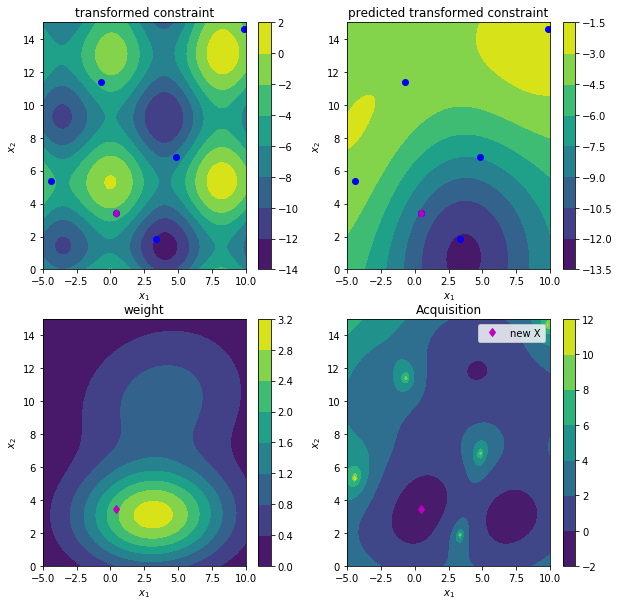

-------------------------------------------------------------------
------------------------- Iteration 2/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([3.33992742 1.86632631]), Best value: -12.115864046394966
New  location: ([[6.39016999 4.10718777]]), New  value: [-3.24530779]


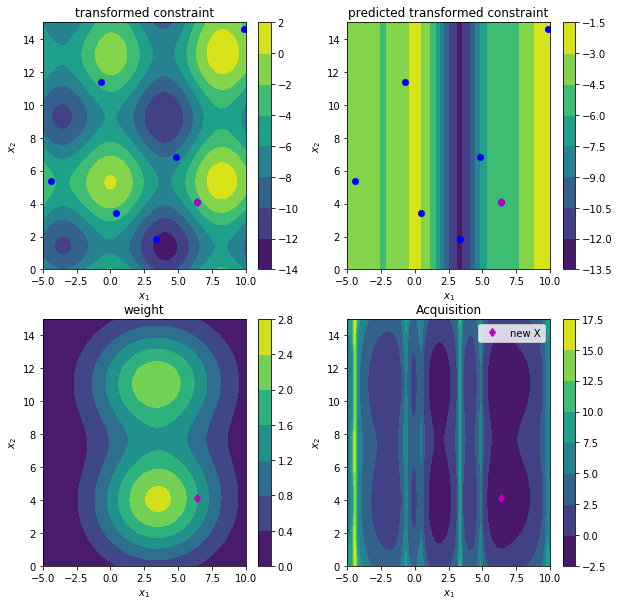

-------------------------------------------------------------------
------------------------- Iteration 3/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([3.33992742 1.86632631]), Best value: -12.115864046394966
New  location: ([[1.80105656 3.7098964 ]]), New  value: [-4.71348148]


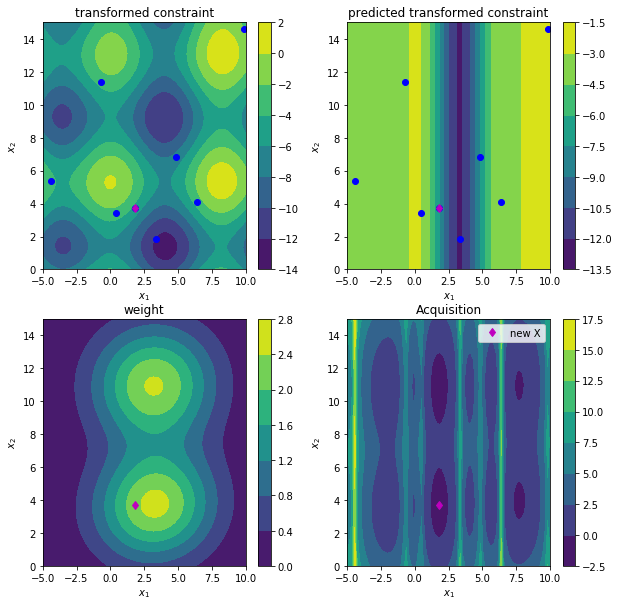

-------------------------------------------------------------------
------------------------- Iteration 4/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([3.33992742 1.86632631]), Best value: -12.115864046394966
New  location: ([[ 7.54202183 11.09035464]]), New  value: [-2.1652132]


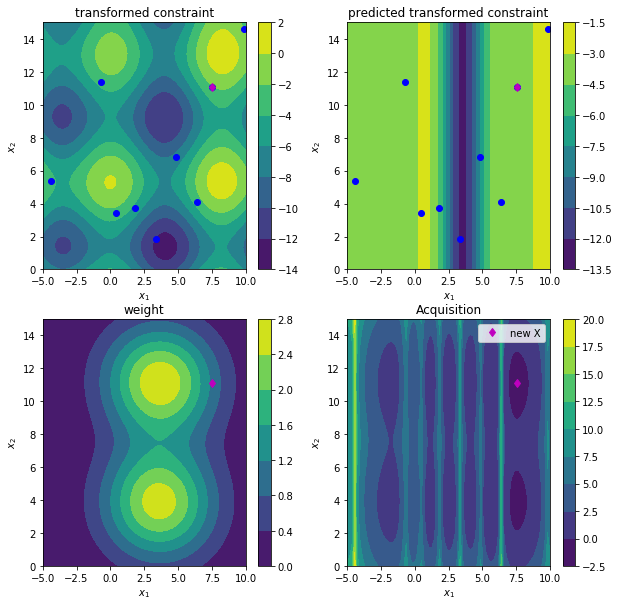

-------------------------------------------------------------------
------------------------- Iteration 5/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([3.33992742 1.86632631]), Best value: -12.115864046394966
New  location: ([[5.59707404 3.99305723]]), New  value: [-5.62739908]


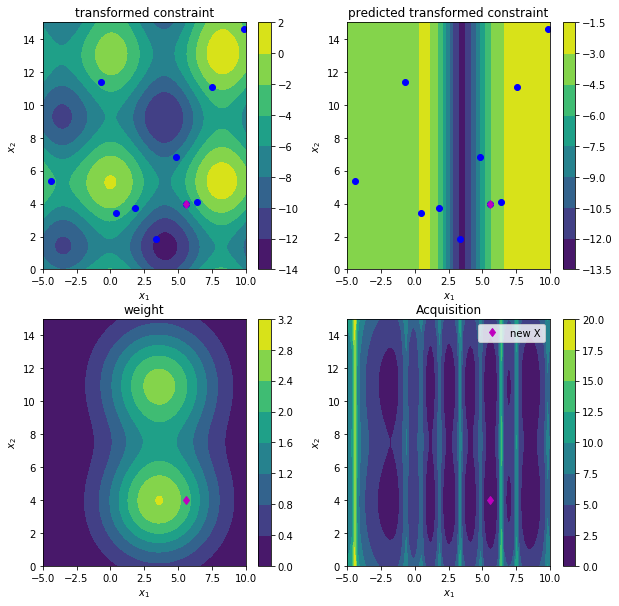

-------------------------------------------------------------------
------------------------- Iteration 6/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([3.33992742 1.86632631]), Best value: -12.115864046394966
New  location: ([[1.15894047 3.90993022]]), New  value: [-2.78981026]


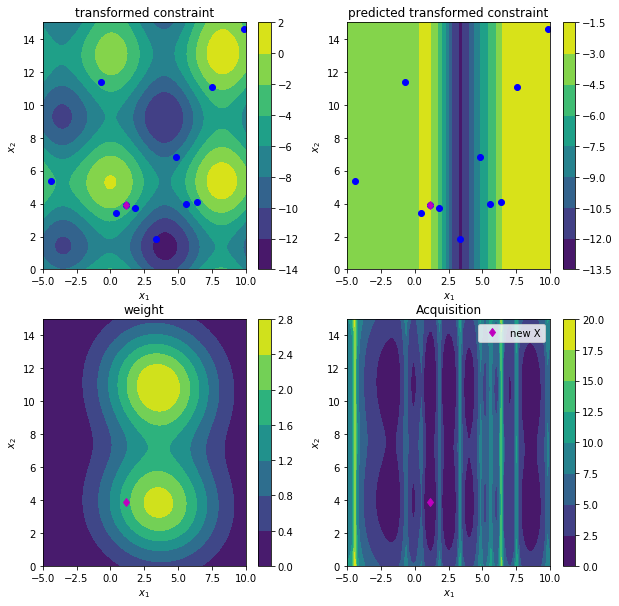

-------------------------------------------------------------------
------------------------- Iteration 7/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([3.33992742 1.86632631]), Best value: -12.115864046394966
New  location: ([[ 1.41112561 10.79975604]]), New  value: [-5.59161597]


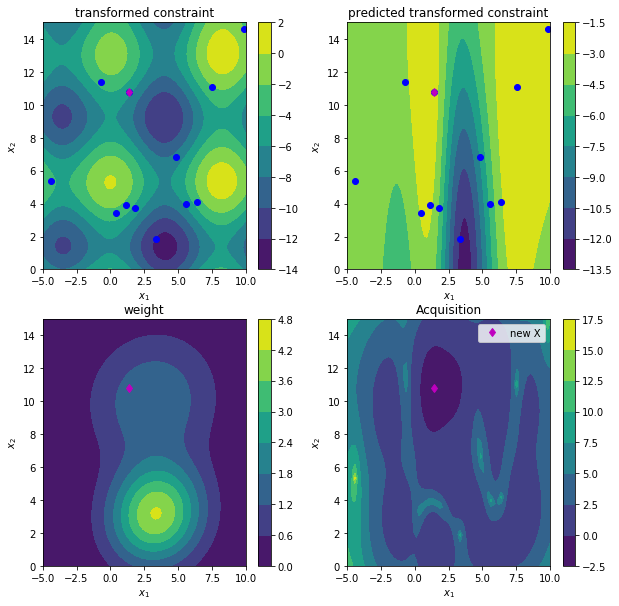

-------------------------------------------------------------------
------------------------- Iteration 8/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([3.33992742 1.86632631]), Best value: -12.115864046394966
New  location: ([[ 3.25951529 11.33059604]]), New  value: [-8.39760587]


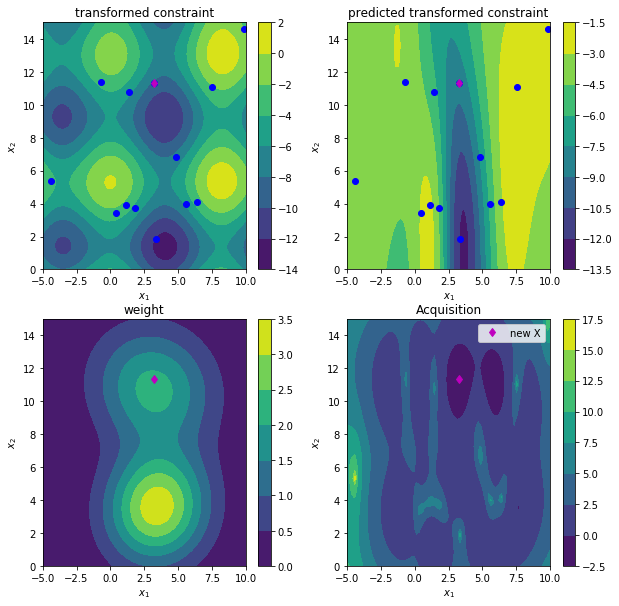

-------------------------------------------------------------------
------------------------- Iteration 9/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([3.33992742 1.86632631]), Best value: -12.115864046394966
New  location: ([[7.67420859 3.63394895]]), New  value: [-1.81952502]


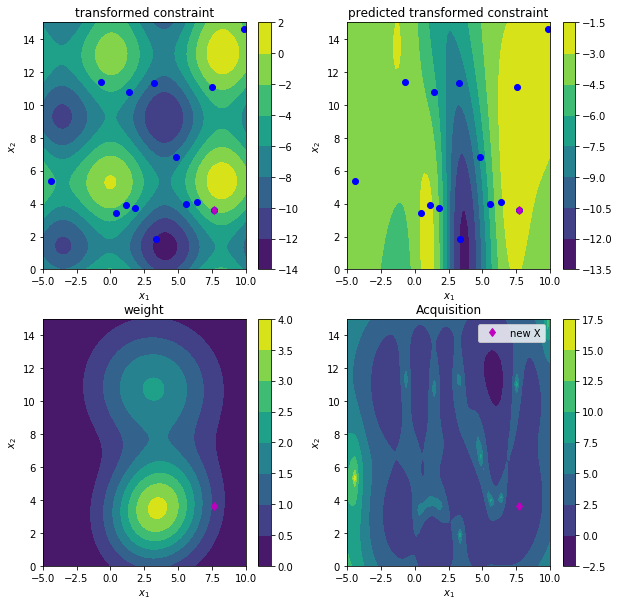

-------------------------------------------------------------------
------------------------- Iteration 10/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([3.33992742 1.86632631]), Best value: -12.115864046394966
New  location: ([[ 5.78179186 11.36083845]]), New  value: [-5.870525]


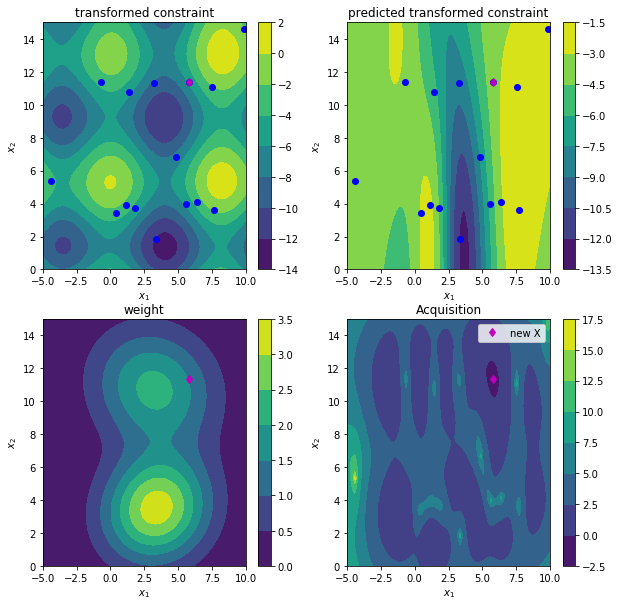

-------------------------------------------------------------------
------------------------- Iteration 11/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([3.33992742 1.86632631]), Best value: -12.115864046394966
New  location: ([[4.46930958 2.76639771]]), New  value: [-10.79778891]


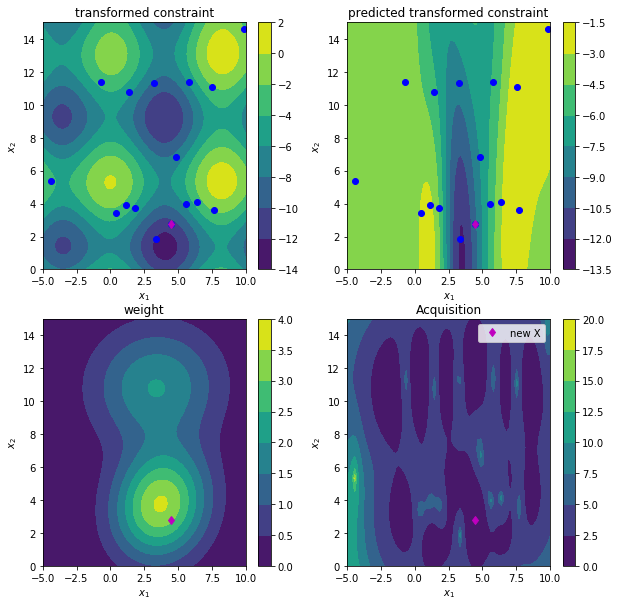

-------------------------------------------------------------------
------------------------- Iteration 12/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([3.33992742 1.86632631]), Best value: -12.115864046394966
New  location: ([[8.81802833 9.92334964]]), New  value: [-4.15547069]


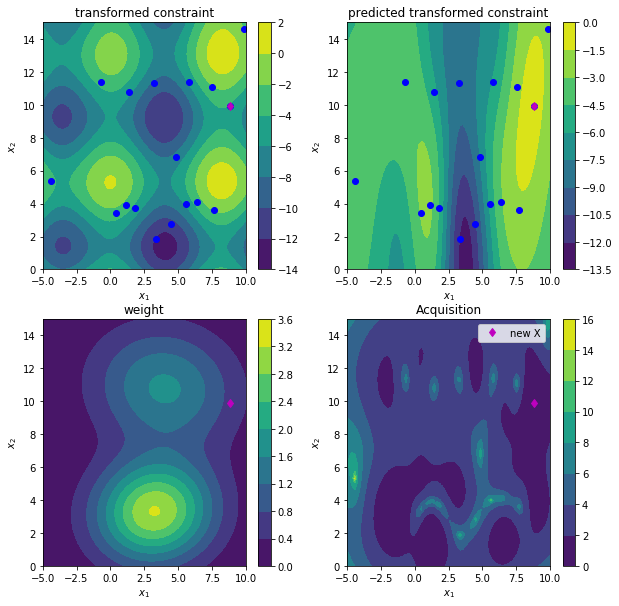

-------------------------------------------------------------------
------------------------- Iteration 13/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([3.33992742 1.86632631]), Best value: -12.115864046394966
New  location: ([[1.2365797  1.63365156]]), New  value: [-7.5750693]


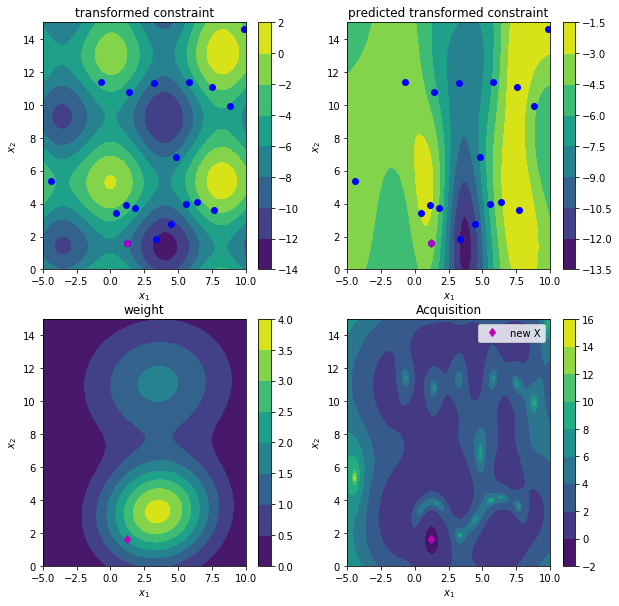

-------------------------------------------------------------------
------------------------- Iteration 14/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([3.33992742 1.86632631]), Best value: -12.115864046394966
New  location: ([[6.15692512 1.76619491]]), New  value: [-9.05933582]


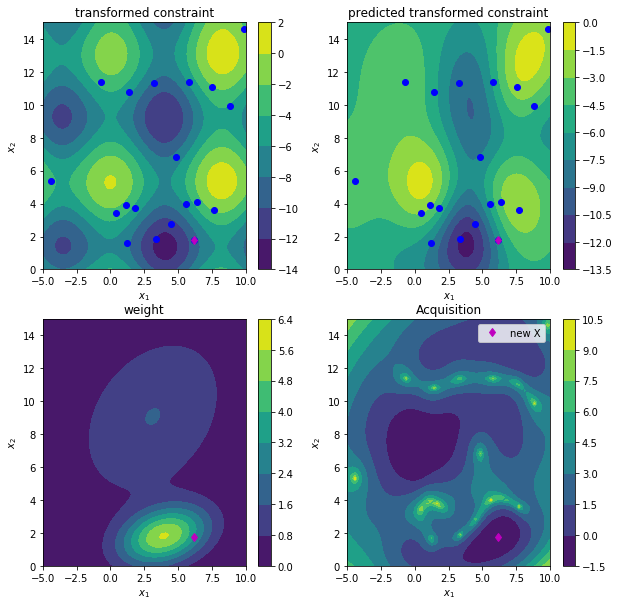

-------------------------------------------------------------------
------------------------- Iteration 15/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([3.33992742 1.86632631]), Best value: -12.115864046394966
New  location: ([[0.19454392 5.7528482 ]]), New  value: [-0.08120447]


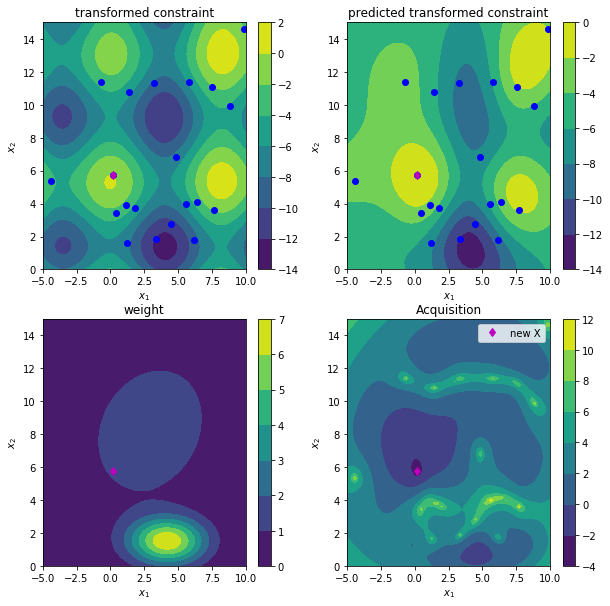

-------------------------------------------------------------------
------------------------- Iteration 16/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([3.33992742 1.86632631]), Best value: -12.115864046394966
New  location: ([[1.49864941 7.42843472]]), New  value: [-5.11534248]


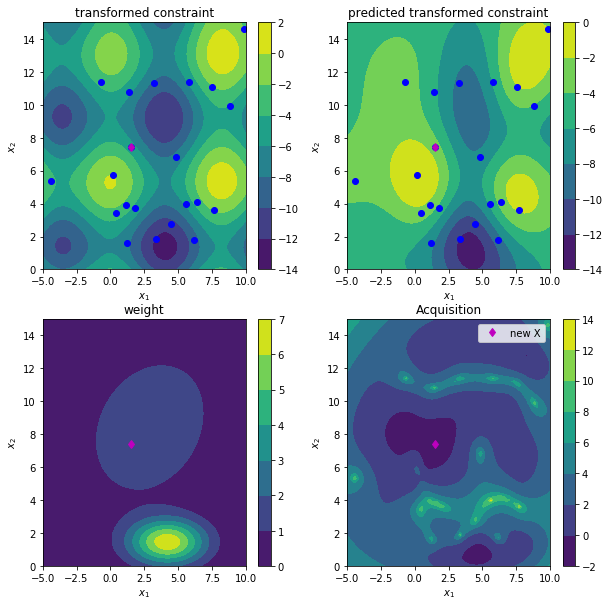

-------------------------------------------------------------------
------------------------- Iteration 17/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([3.33992742 1.86632631]), Best value: -12.115864046394966
New  location: ([[-1.28307389  7.50332881]]), New  value: [-4.79526575]


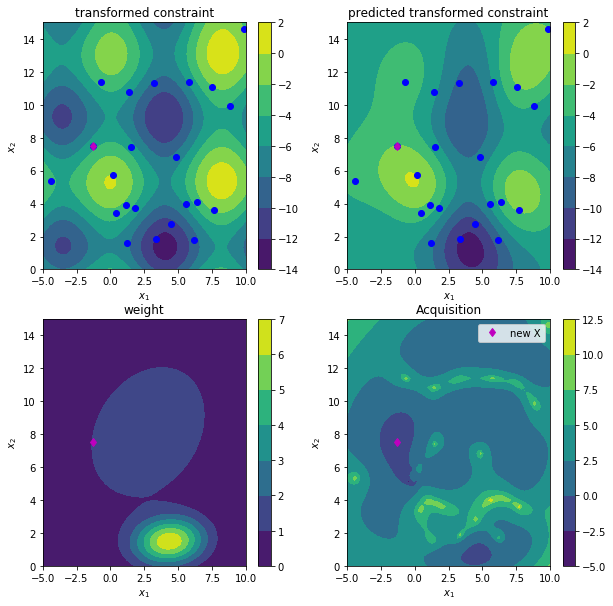

-------------------------------------------------------------------
------------------------- Iteration 18/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([3.33992742 1.86632631]), Best value: -12.115864046394966
New  location: ([[-0.42182679  4.86959985]]), New  value: [-0.17235723]


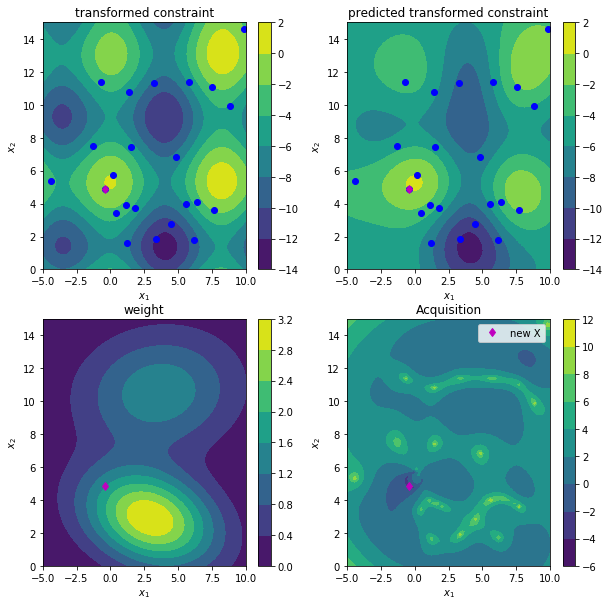

-------------------------------------------------------------------
------------------------- Iteration 19/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[4.56756744 0.77135722]]), New  value: [-12.16207864]


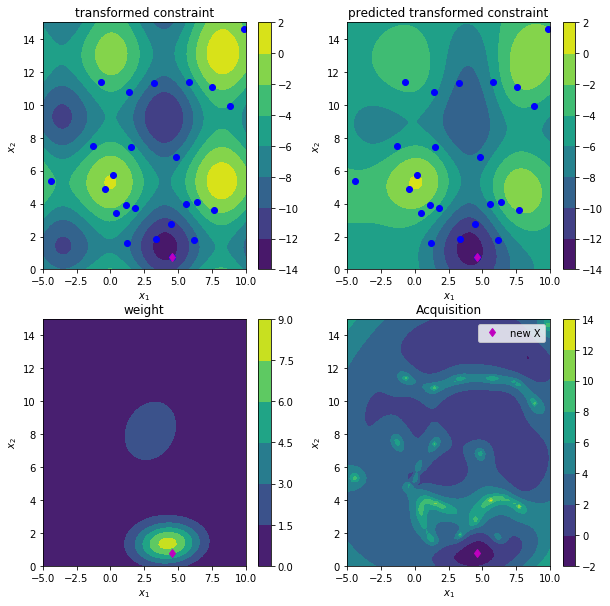

-------------------------------------------------------------------
------------------------- Iteration 20/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[ 8.43972459 12.61902873]]), New  value: [0.98966321]


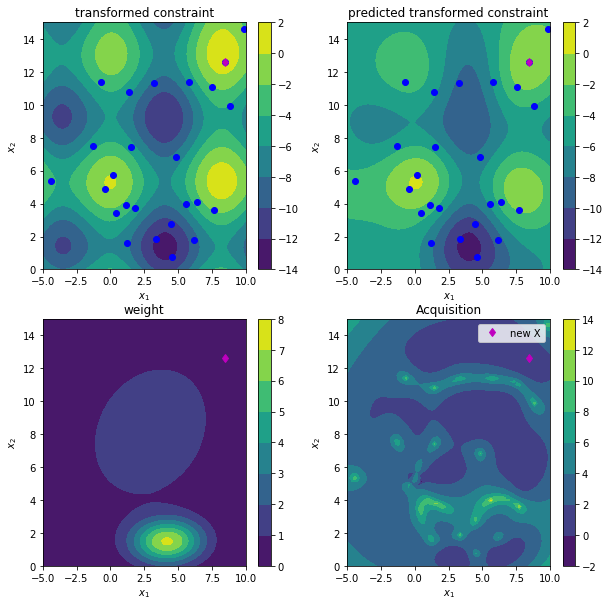

-------------------------------------------------------------------
------------------------- Iteration 21/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[ 7.46498669 13.30460162]]), New  value: [0.55237596]


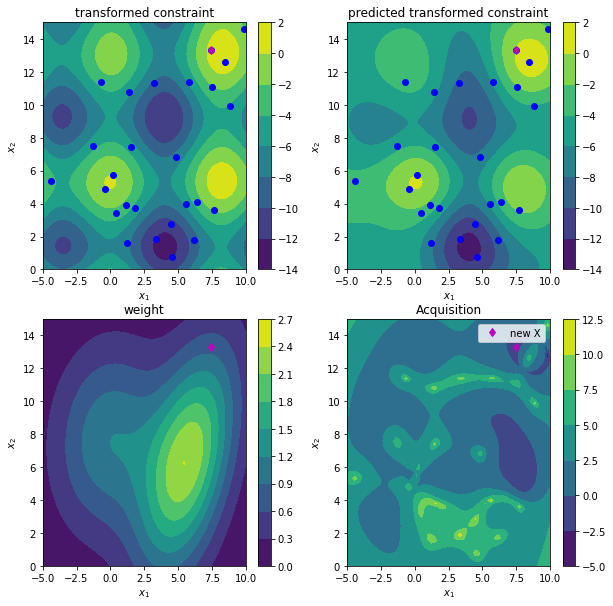

-------------------------------------------------------------------
------------------------- Iteration 22/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[ 9.47993119 13.28681914]]), New  value: [0.01265583]


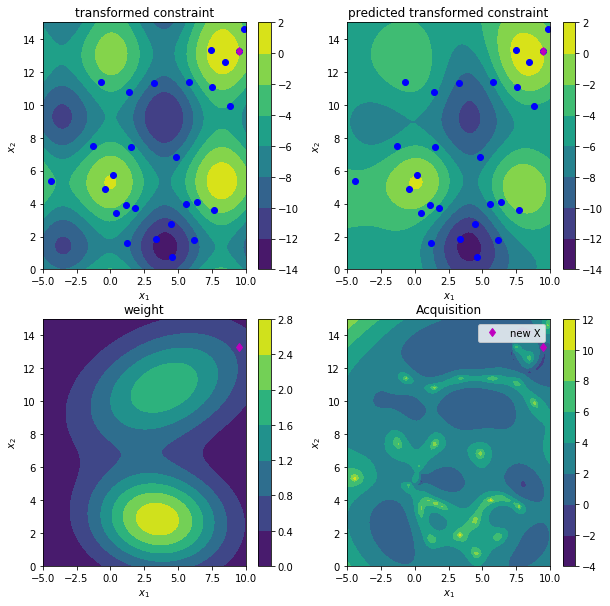

-------------------------------------------------------------------
------------------------- Iteration 23/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[8.01884942 4.97773108]]), New  value: [0.91392963]


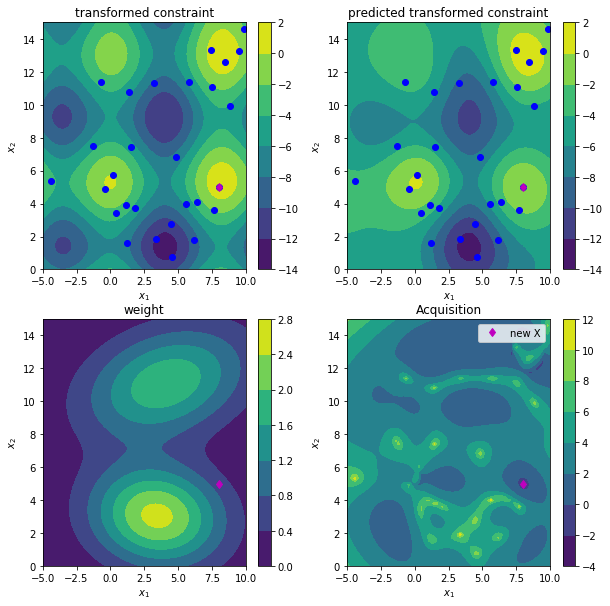

-------------------------------------------------------------------
------------------------- Iteration 24/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[9.23300618 6.06882038]]), New  value: [-0.27305611]


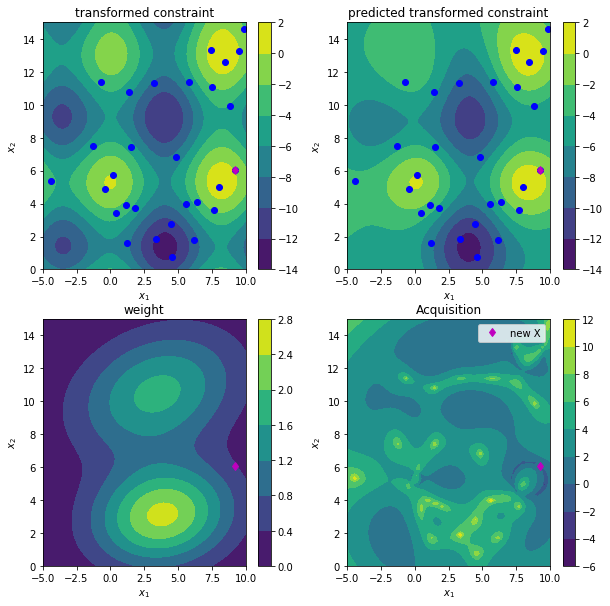

-------------------------------------------------------------------
------------------------- Iteration 25/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[ 1.26388471 12.96114832]]), New  value: [-2.06898102]


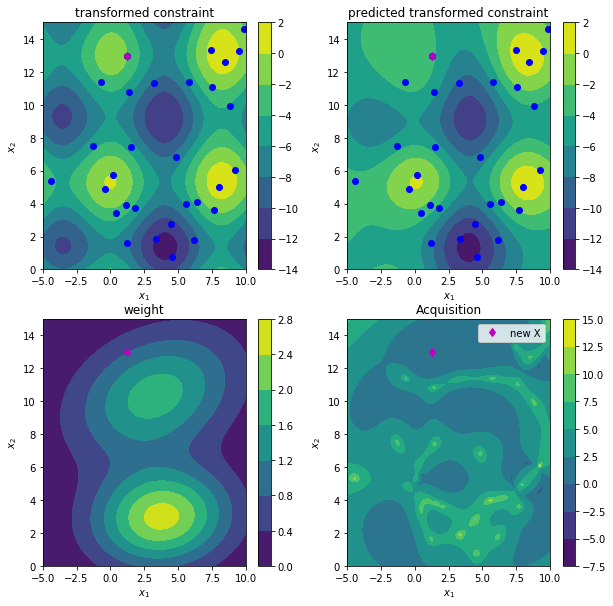

-------------------------------------------------------------------
------------------------- Iteration 26/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[8.20996855 6.2907507 ]]), New  value: [0.32119874]


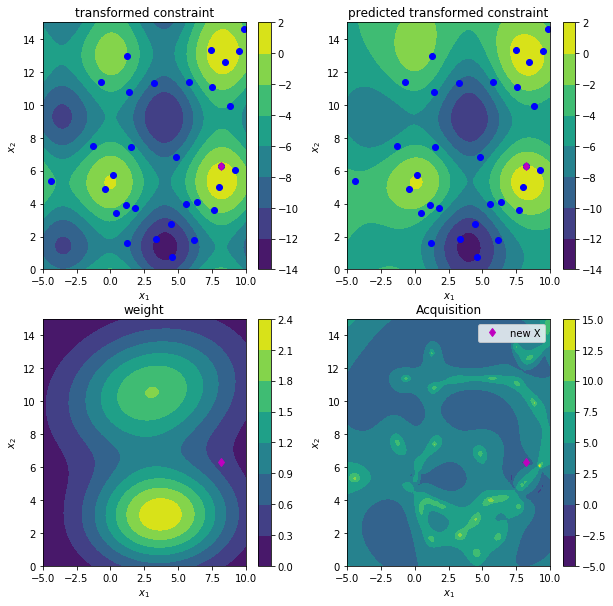

-------------------------------------------------------------------
------------------------- Iteration 27/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[ 9.44564111 12.57966319]]), New  value: [-0.18063271]


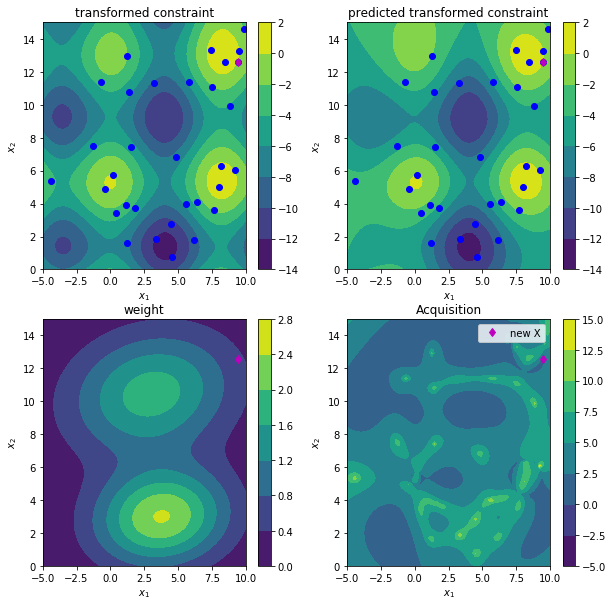

-------------------------------------------------------------------
------------------------- Iteration 28/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[-0.35436963  5.1664791 ]]), New  value: [0.03226156]


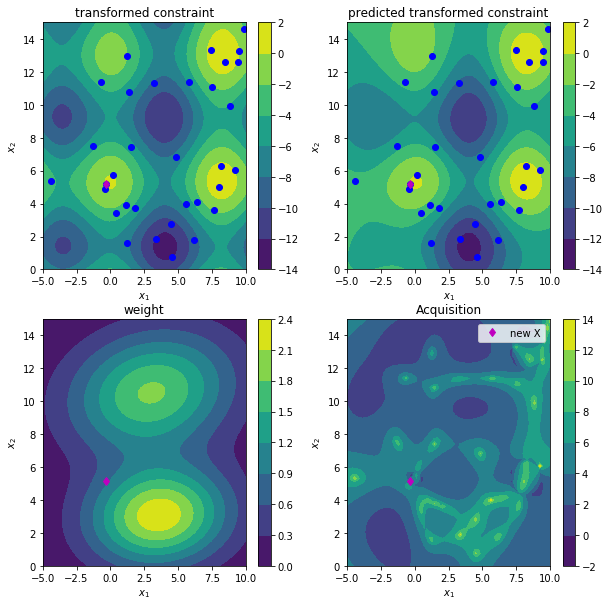

-------------------------------------------------------------------
------------------------- Iteration 29/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[ 7.88204905 14.29148946]]), New  value: [0.19581084]


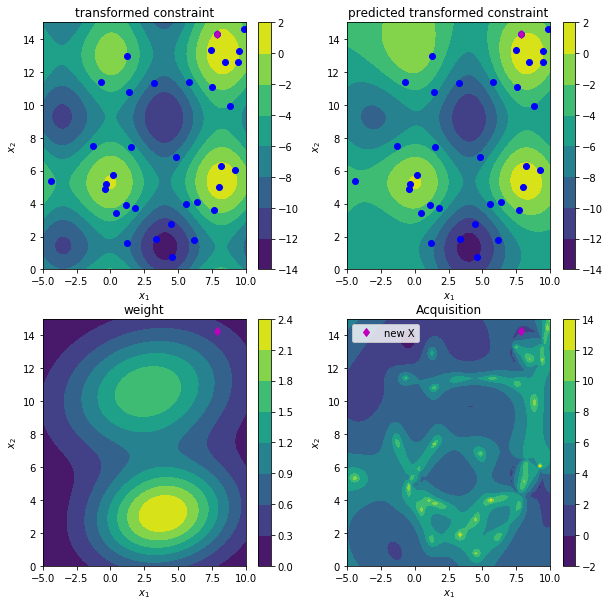

-------------------------------------------------------------------
------------------------- Iteration 30/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[ 9.41966664 13.59624166]]), New  value: [-0.01037313]


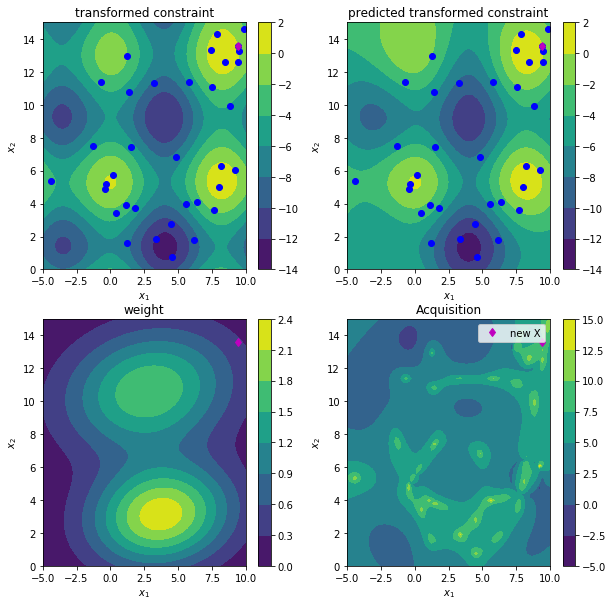

-------------------------------------------------------------------
------------------------- Iteration 31/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[7.84878496 6.41039092]]), New  value: [-0.01960684]


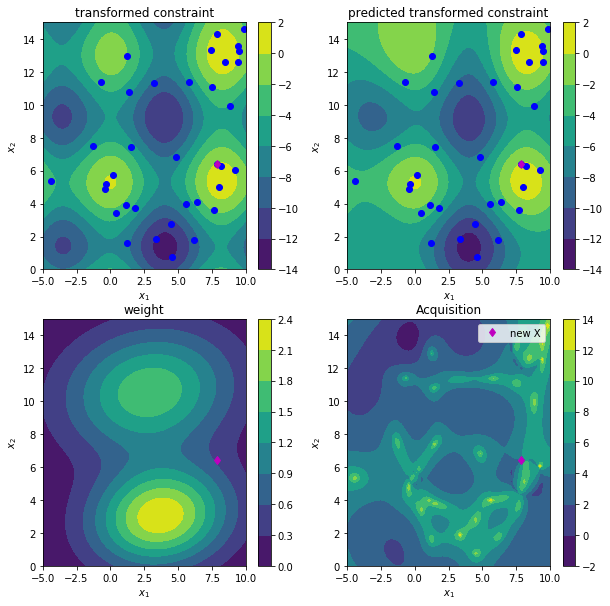

-------------------------------------------------------------------
------------------------- Iteration 32/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[9.04340262 4.58010736]]), New  value: [-0.14253983]


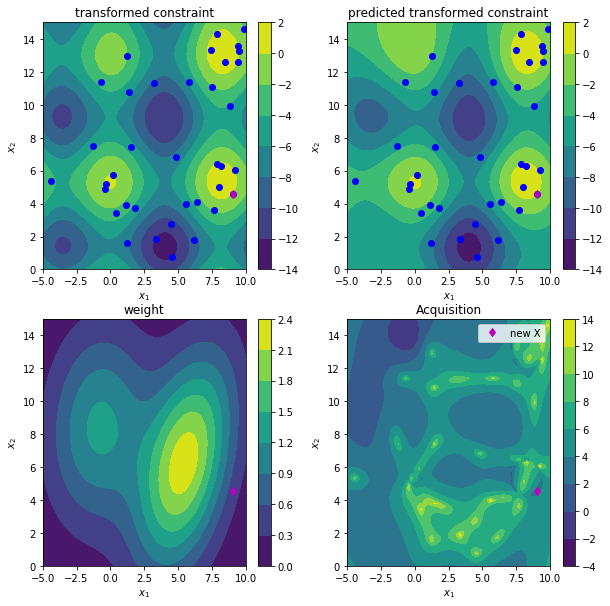

-------------------------------------------------------------------
------------------------- Iteration 33/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[-0.60234396 14.34588113]]), New  value: [-2.38193487]


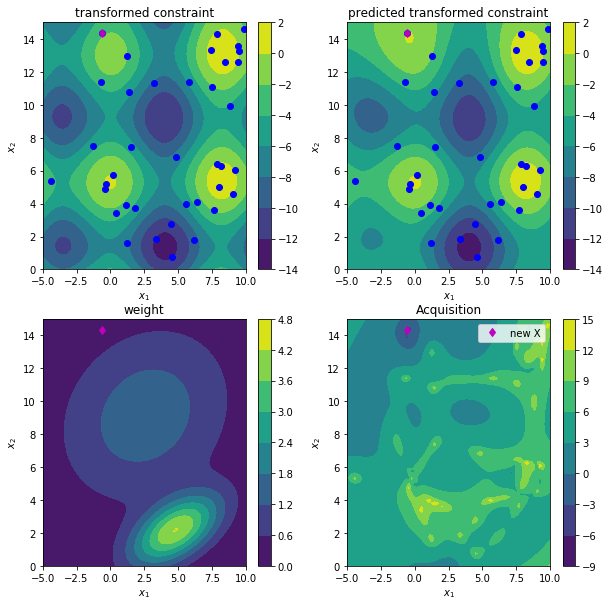

-------------------------------------------------------------------
------------------------- Iteration 34/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[ 3.67485252 14.18541626]]), New  value: [-7.41728666]


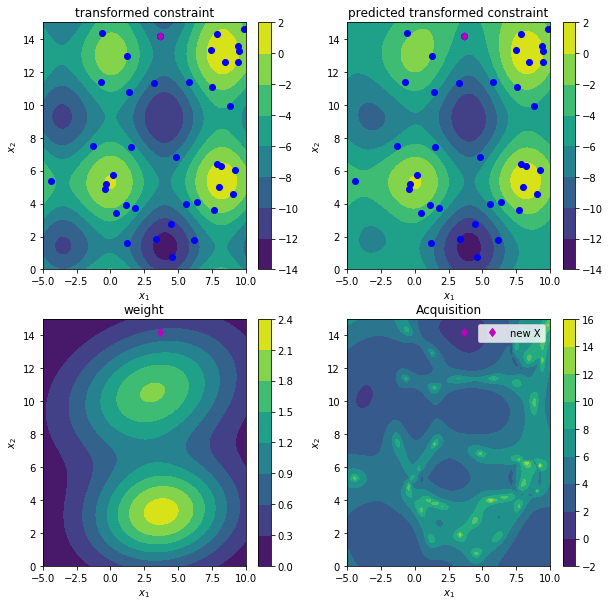

-------------------------------------------------------------------
------------------------- Iteration 35/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[ 7.32150928 12.51859261]]), New  value: [0.02768209]


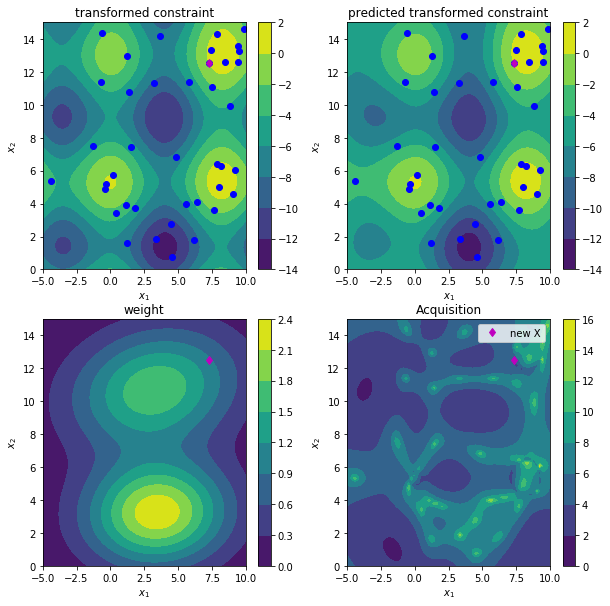

-------------------------------------------------------------------
------------------------- Iteration 36/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[-3.72432464 10.75802225]]), New  value: [-8.85278435]


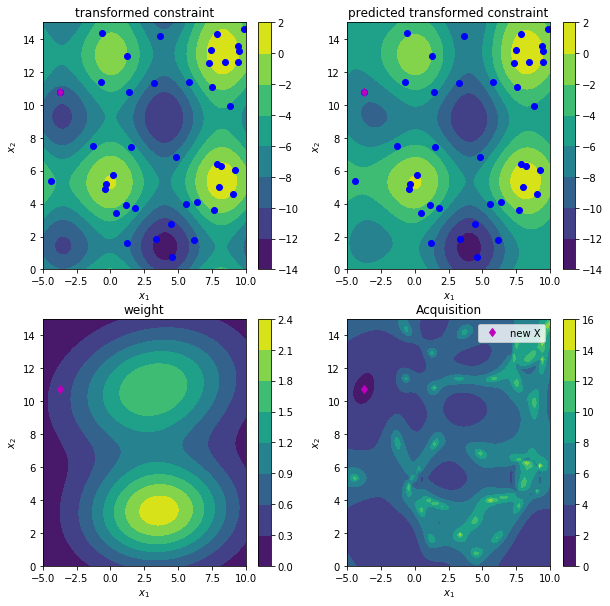

-------------------------------------------------------------------
------------------------- Iteration 37/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[7.17323571 5.00564239]]), New  value: [-0.0621937]


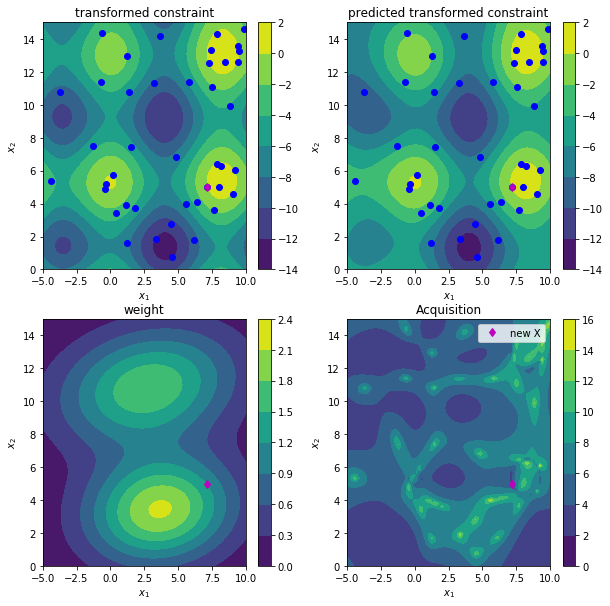

-------------------------------------------------------------------
------------------------- Iteration 38/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[ 7.22733901 13.6009178 ]]), New  value: [-0.01163396]


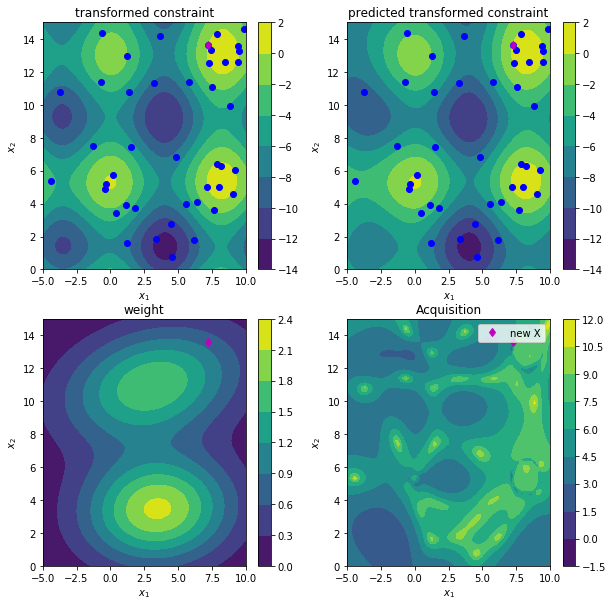

-------------------------------------------------------------------
------------------------- Iteration 39/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[ 7.965428   11.92916954]]), New  value: [-0.00327781]


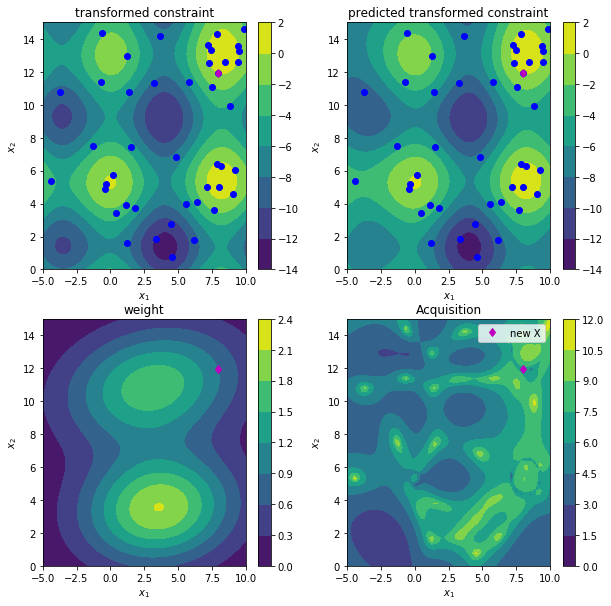

-------------------------------------------------------------------
------------------------- Iteration 40/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[-2.16993252  1.27033359]]), New  value: [-9.00223231]


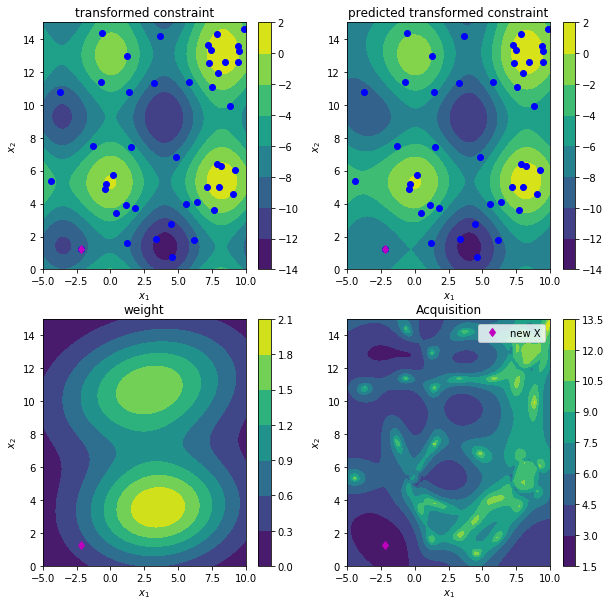

-------------------------------------------------------------------
------------------------- Iteration 41/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[-2.44823293 12.96029868]]), New  value: [-4.6379969]


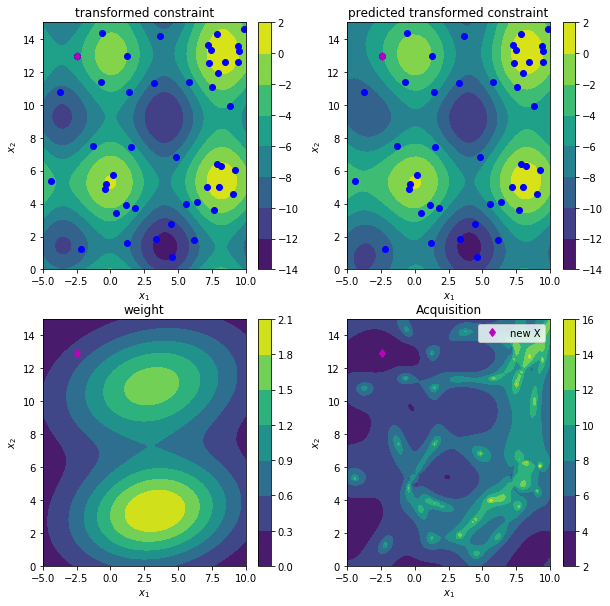

-------------------------------------------------------------------
------------------------- Iteration 42/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[-4.84221841  2.69870764]]), New  value: [-7.27129747]


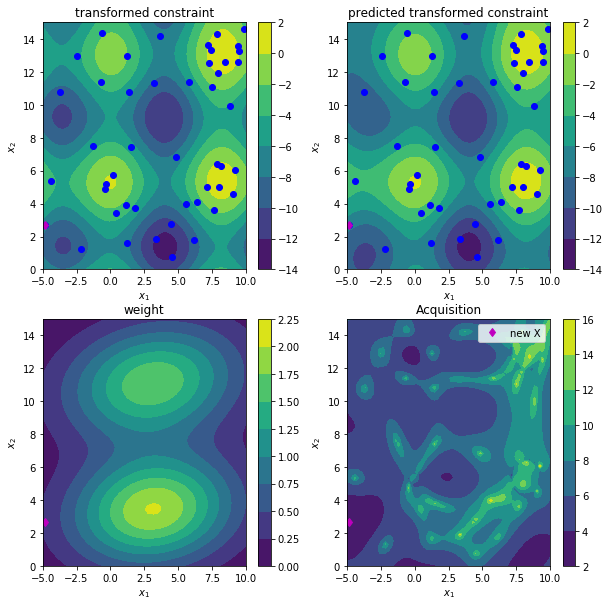

-------------------------------------------------------------------
------------------------- Iteration 43/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[8.41917959 0.4981912 ]]), New  value: [-5.03276409]


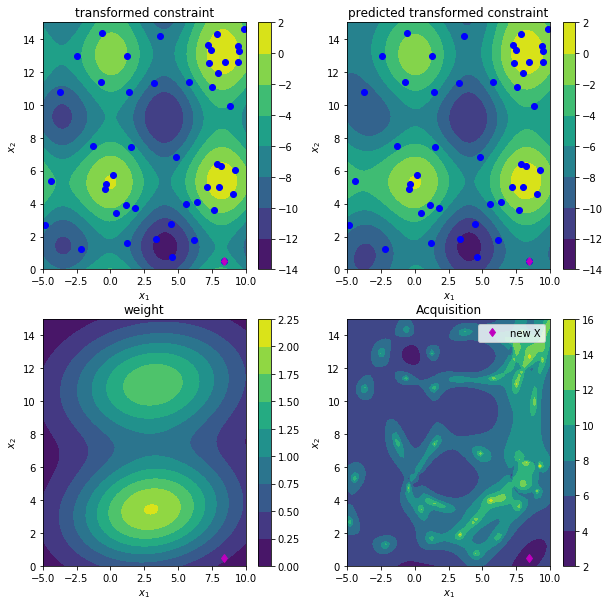

-------------------------------------------------------------------
------------------------- Iteration 44/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[-0.20048384 12.82985424]]), New  value: [-0.95239411]


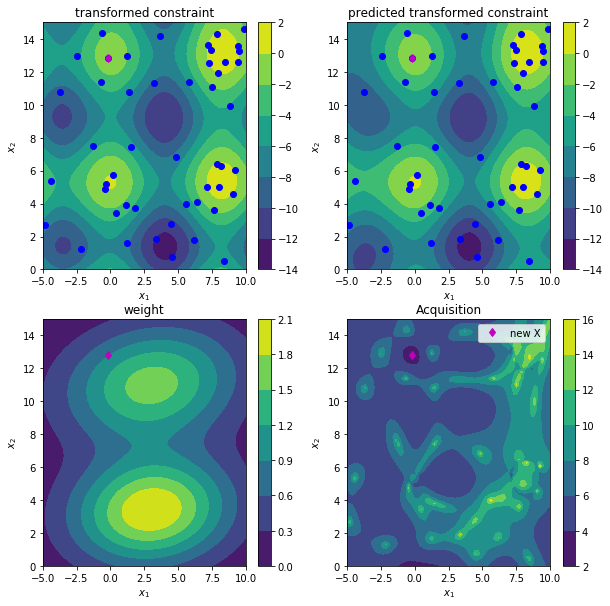

-------------------------------------------------------------------
------------------------- Iteration 45/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[-3.64986471  7.50879122]]), New  value: [-8.00943144]


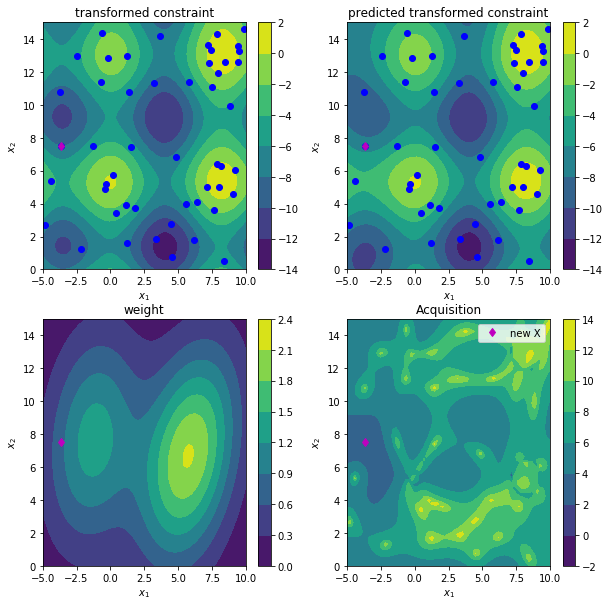

-------------------------------------------------------------------
------------------------- Iteration 46/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[-5.         12.10991038]]), New  value: [-4.71848521]


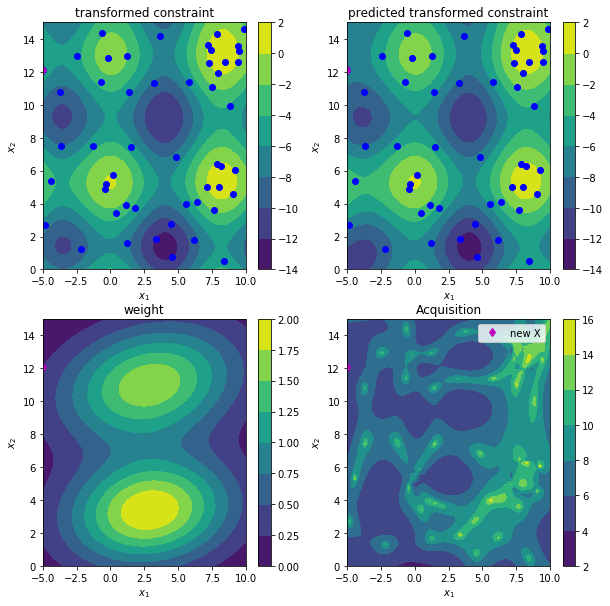

-------------------------------------------------------------------
------------------------- Iteration 47/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[-0.12480162  0.        ]]), New  value: [-3.89092504]


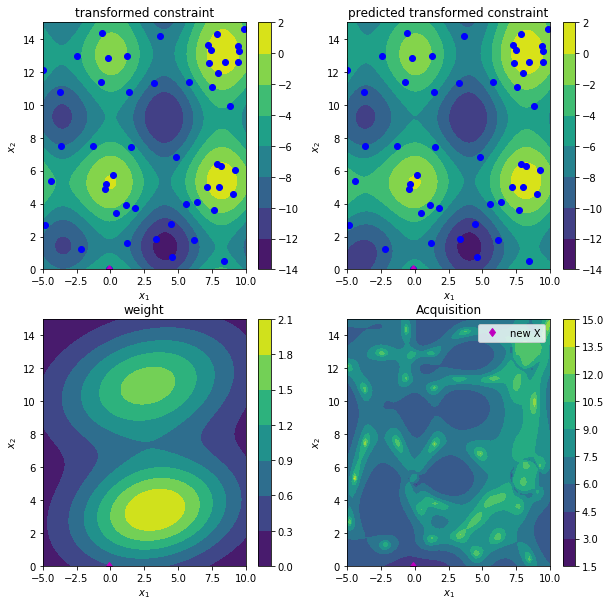

-------------------------------------------------------------------
------------------------- Iteration 48/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[7.19178716 5.68447068]]), New  value: [-0.00633319]


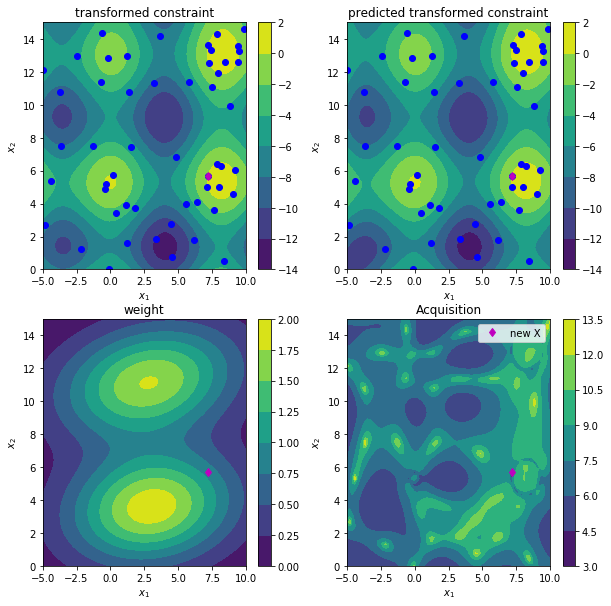

-------------------------------------------------------------------
------------------------- Iteration 49/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[ 7.77934419 12.0155295 ]]), New  value: [-0.0031609]


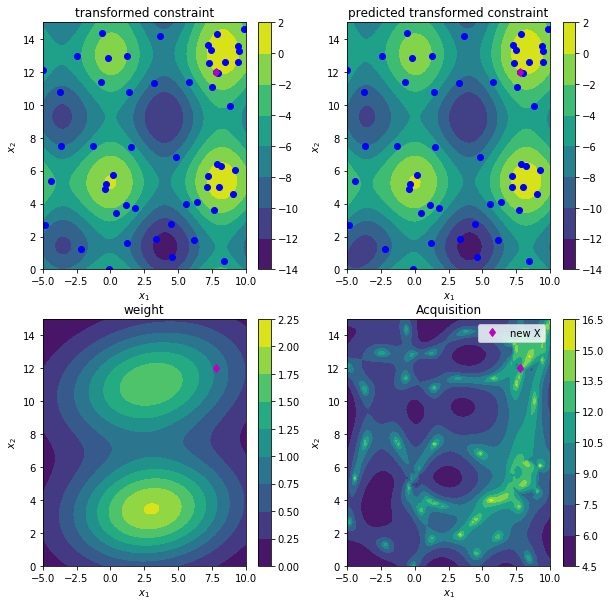

-------------------------------------------------------------------
------------------------- Iteration 50/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[ 7.73180168 12.04635956]]), New  value: [-0.00095182]


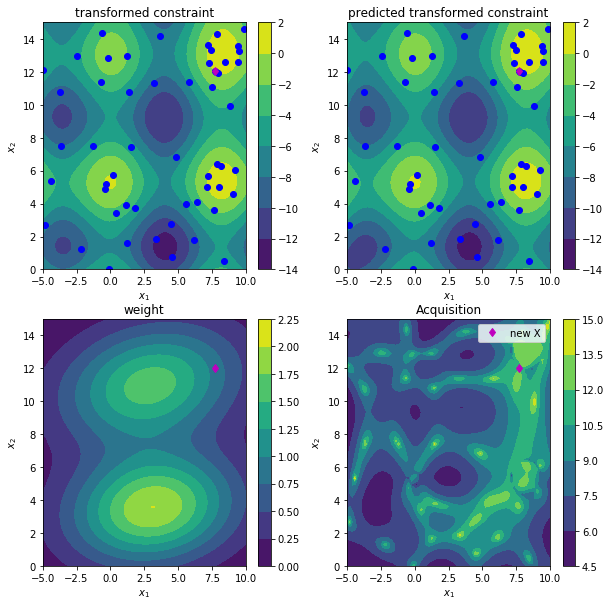

-------------------------------------------------------------------
------------------------- Iteration 51/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[-5.          9.40838334]]), New  value: [-8.78770779]


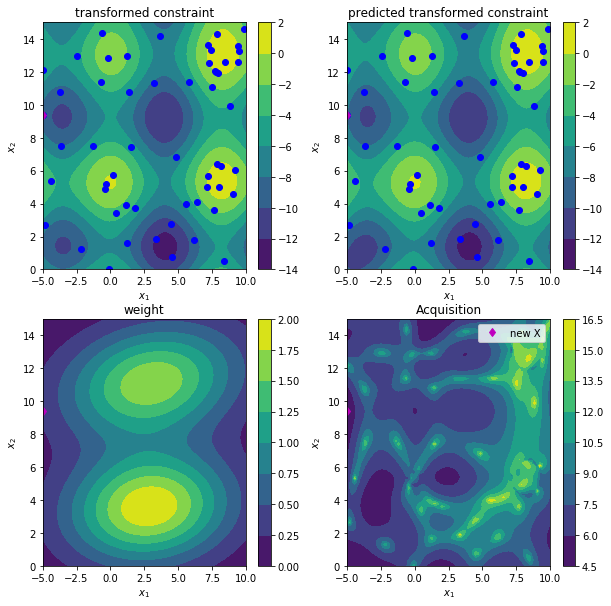

-------------------------------------------------------------------
------------------------- Iteration 52/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[-2.99033532  3.600132  ]]), New  value: [-6.38651467]


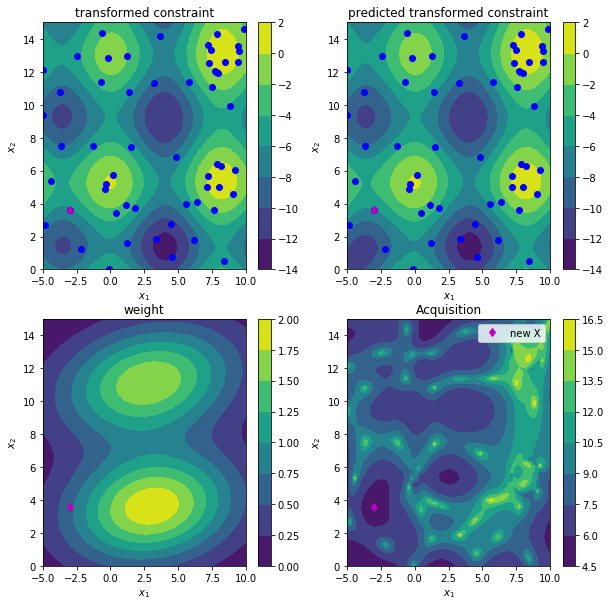

-------------------------------------------------------------------
------------------------- Iteration 53/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[-4.78055251  0.        ]]), New  value: [-6.48262973]


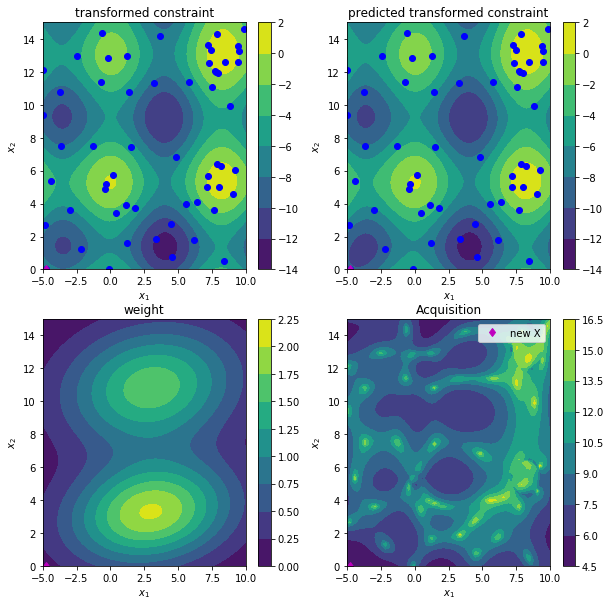

-------------------------------------------------------------------
------------------------- Iteration 54/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[1.88954825 0.        ]]), New  value: [-6.89069892]


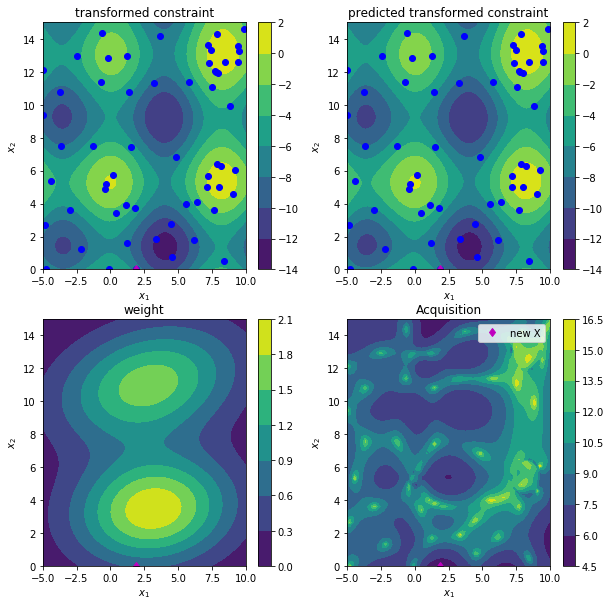

-------------------------------------------------------------------
------------------------- Iteration 55/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[6.53754511 0.        ]]), New  value: [-6.06768477]


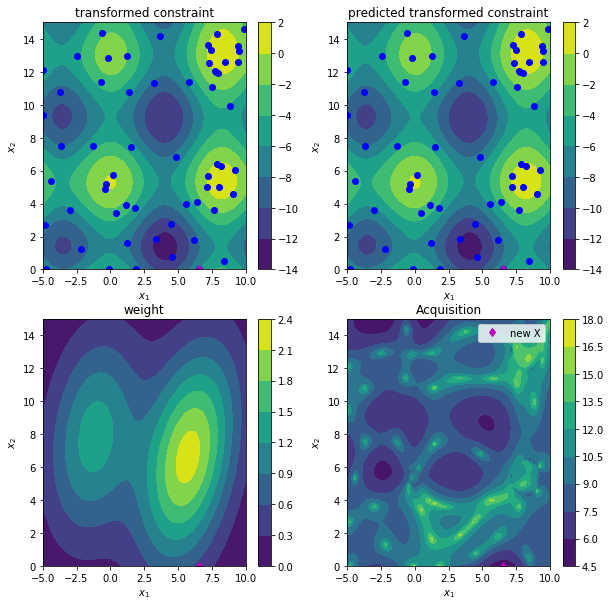

-------------------------------------------------------------------
------------------------- Iteration 56/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[ 1.36867033 15.        ]]), New  value: [-4.31322285]


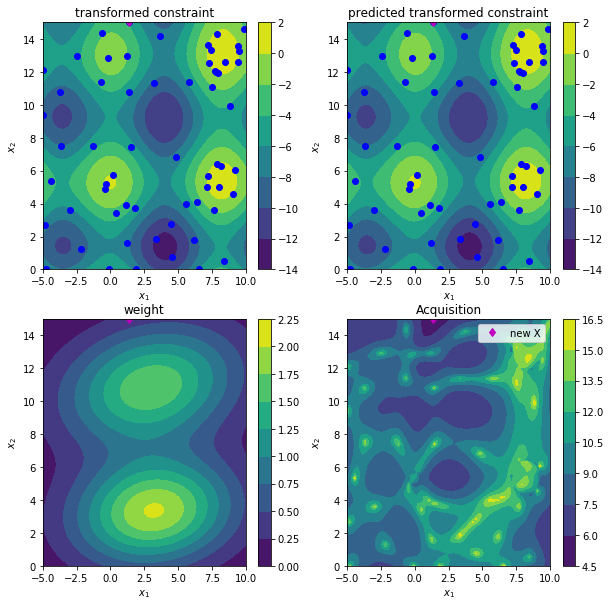

-------------------------------------------------------------------
------------------------- Iteration 57/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[10.          2.12413449]]), New  value: [-7.78707758]


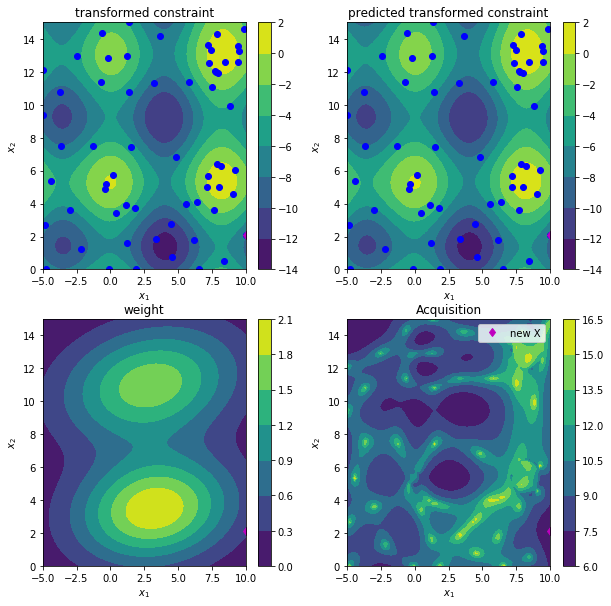

-------------------------------------------------------------------
------------------------- Iteration 58/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[-5.         13.95062747]]), New  value: [-4.7736366]


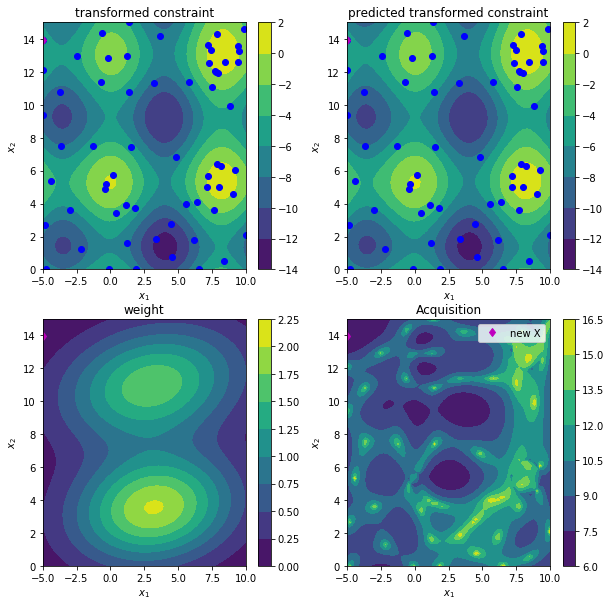

-------------------------------------------------------------------
------------------------- Iteration 59/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[2.46896397 5.47296481]]), New  value: [-4.1167506]


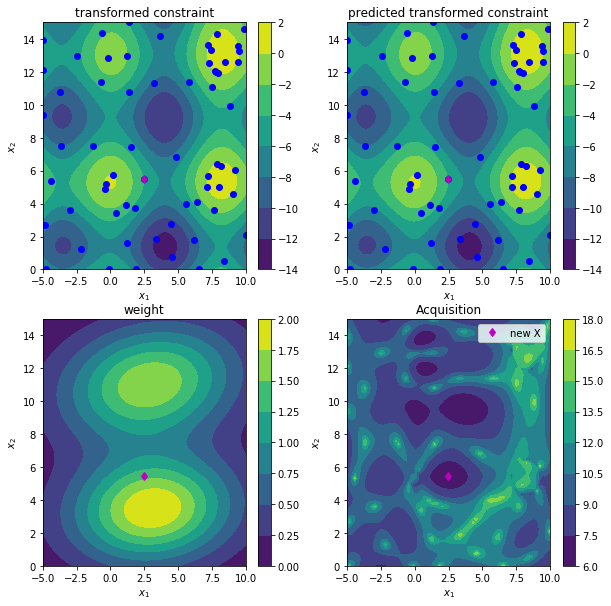

-------------------------------------------------------------------
------------------------- Iteration 60/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[7.14359158 5.42398916]]), New  value: [-3.20666455e-05]


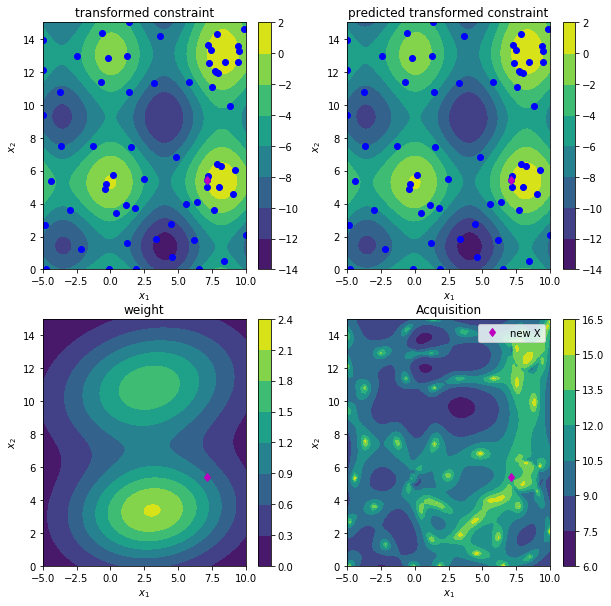

-------------------------------------------------------------------
------------------------- Iteration 61/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[-2.47092726  0.        ]]), New  value: [-7.13983903]


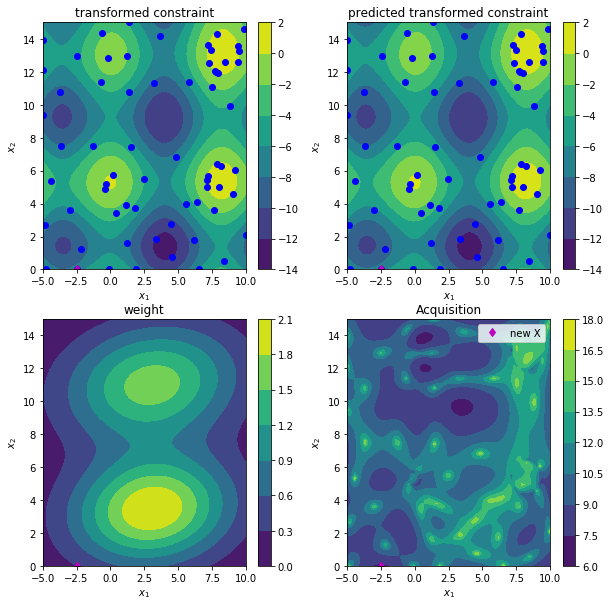

-------------------------------------------------------------------
------------------------- Iteration 62/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[3.43354305 9.65260824]]), New  value: [-11.49836925]


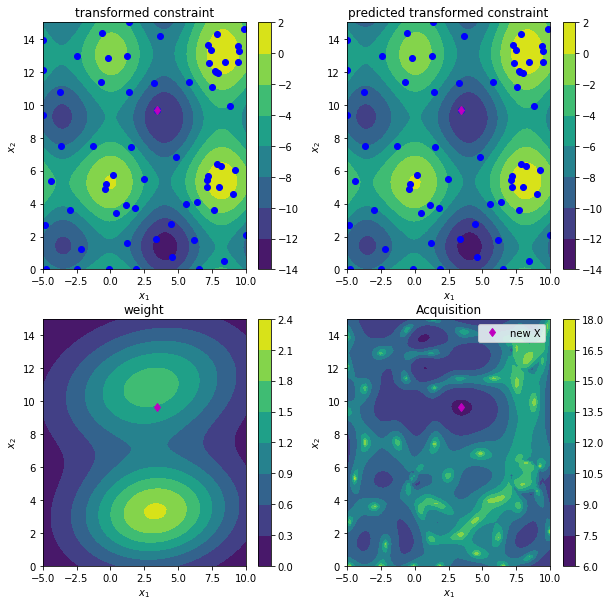

-------------------------------------------------------------------
------------------------- Iteration 63/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[0.39281555 5.17390101]]), New  value: [-0.00021195]


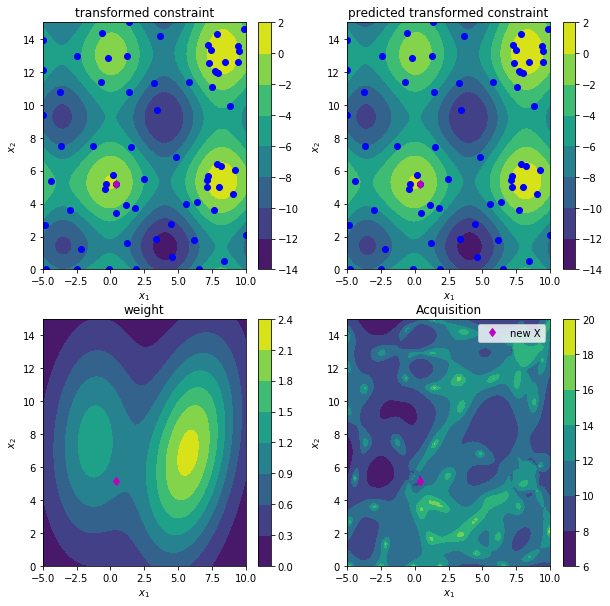

-------------------------------------------------------------------
------------------------- Iteration 64/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[ 0.55022822 13.8111248 ]]), New  value: [-1.47140045]


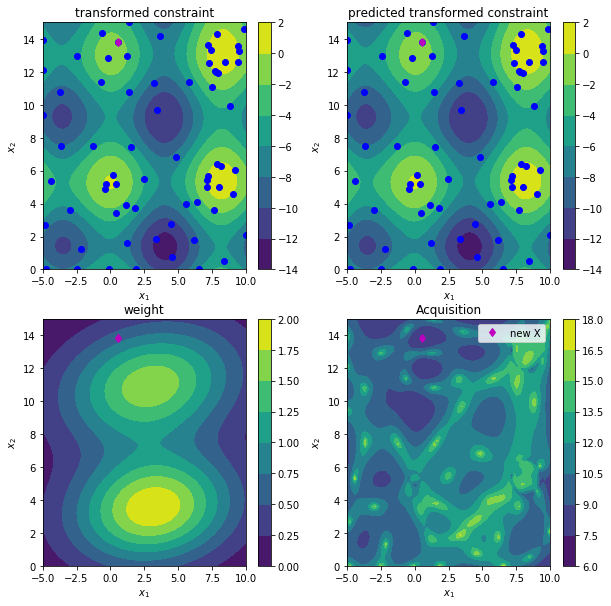

-------------------------------------------------------------------
------------------------- Iteration 65/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[-5.          6.42259027]]), New  value: [-3.67265901]


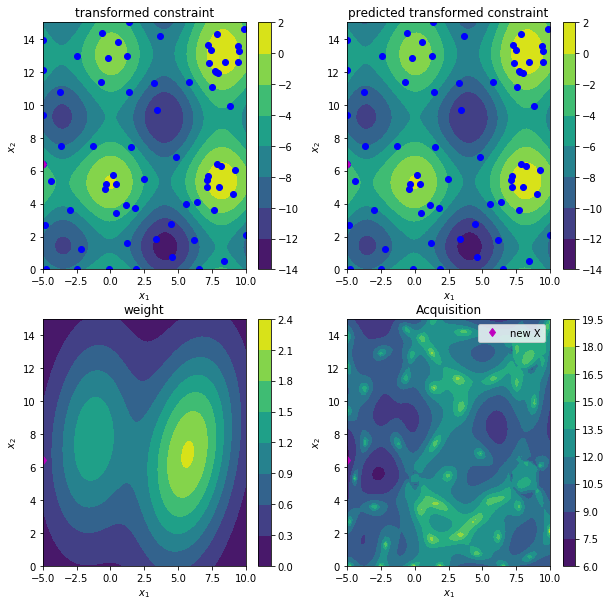

-------------------------------------------------------------------
------------------------- Iteration 66/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[-2.94488448 15.        ]]), New  value: [-7.55920132]


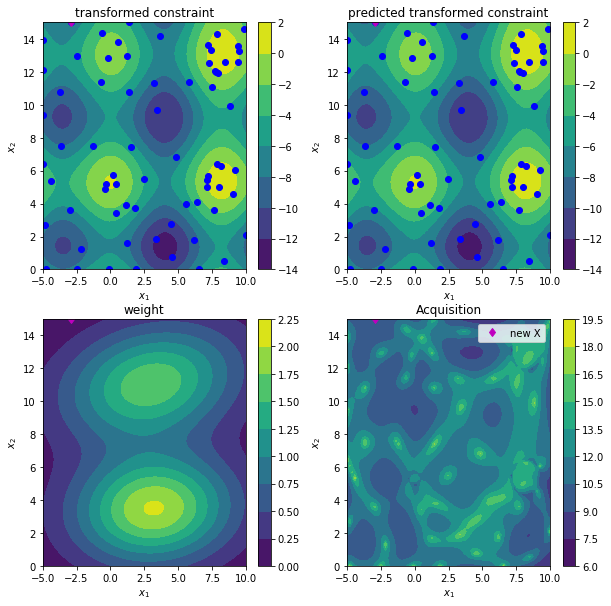

-------------------------------------------------------------------
------------------------- Iteration 67/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[8.92220170e-03 9.43341661e+00]]), New  value: [-5.84634177]


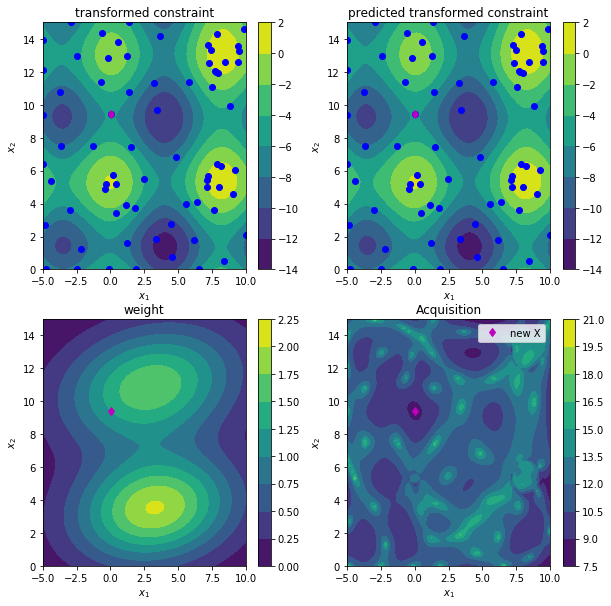

-------------------------------------------------------------------
------------------------- Iteration 68/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[10.          4.83434835]]), New  value: [-1.67917654]


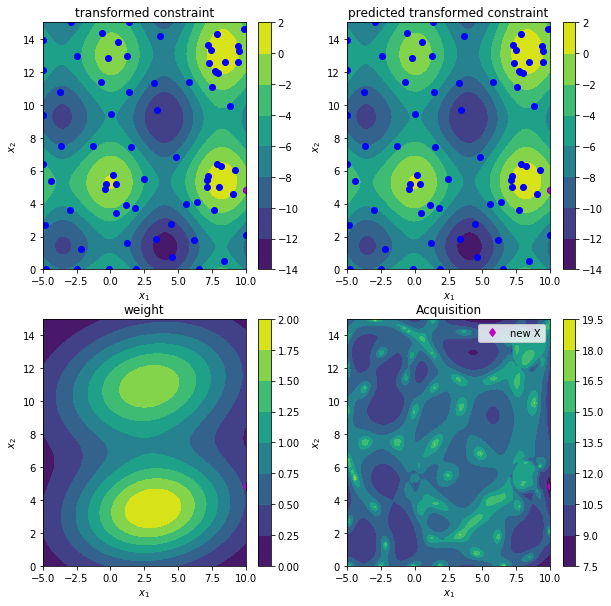

-------------------------------------------------------------------
------------------------- Iteration 69/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[ 5.14788307 15.        ]]), New  value: [-7.20343682]


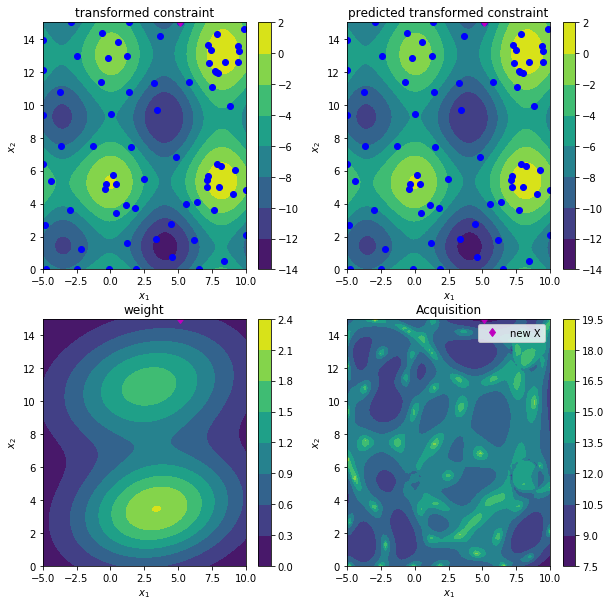

-------------------------------------------------------------------
------------------------- Iteration 70/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[ 4.60560803 12.90199756]]), New  value: [-6.27815289]


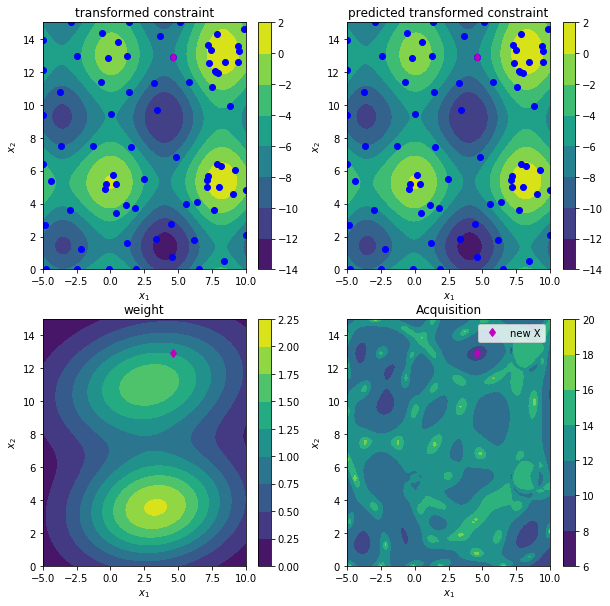

-------------------------------------------------------------------
------------------------- Iteration 71/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[6.12006837 8.43857014]]), New  value: [-7.64432531]


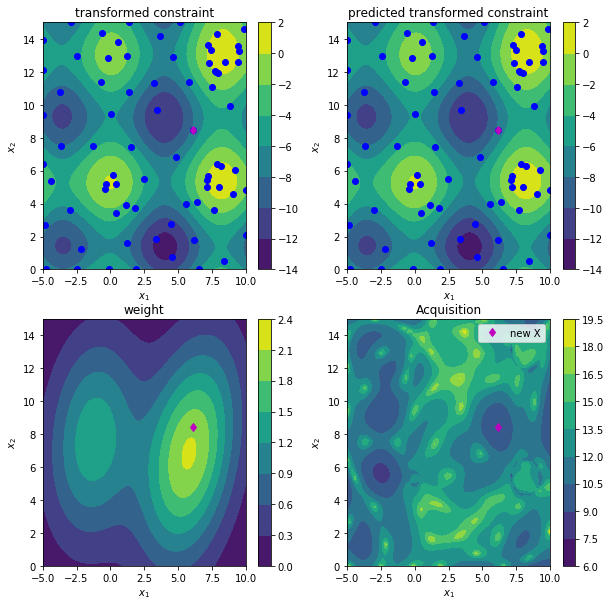

-------------------------------------------------------------------
------------------------- Iteration 72/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[8.18695235 4.29403193]]), New  value: [-0.00066203]


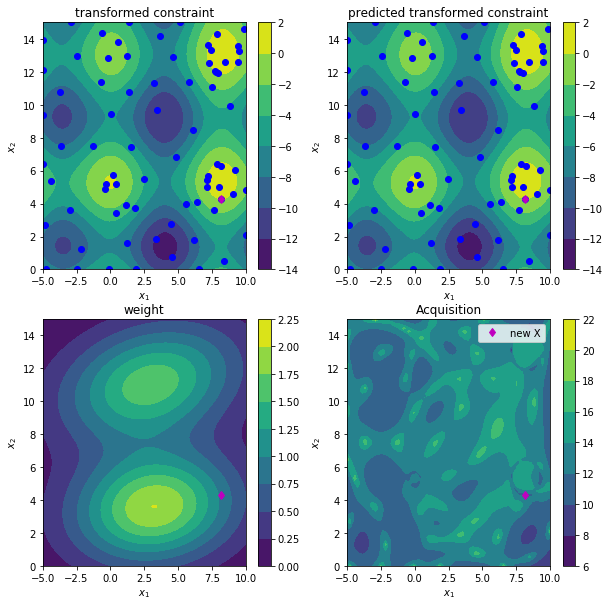

-------------------------------------------------------------------
------------------------- Iteration 73/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[10.  0.]]), New  value: [-6.37638542]


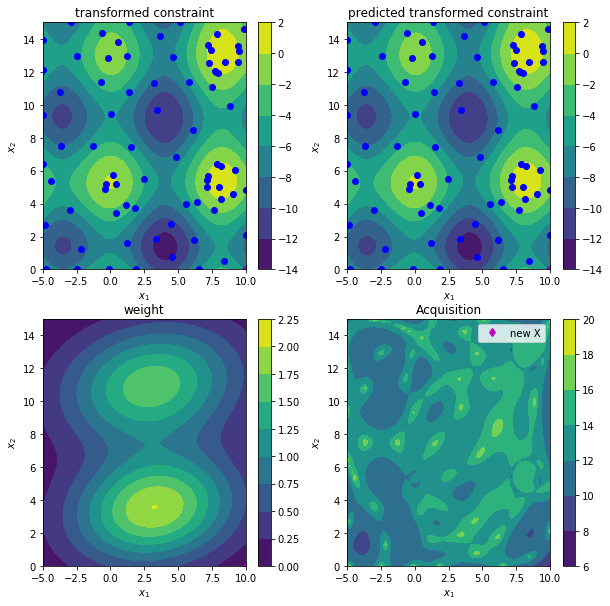

-------------------------------------------------------------------
------------------------- Iteration 74/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[10.         10.32176581]]), New  value: [-5.57288398]


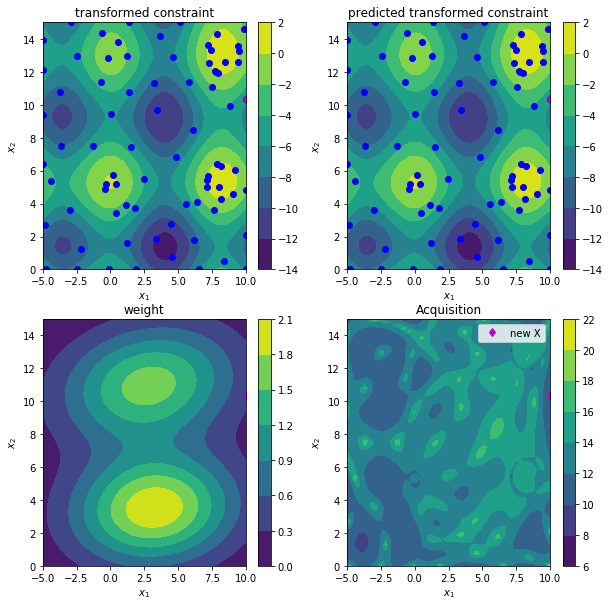

-------------------------------------------------------------------
------------------------- Iteration 75/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[-0.68816859  1.51315875]]), New  value: [-6.56451887]


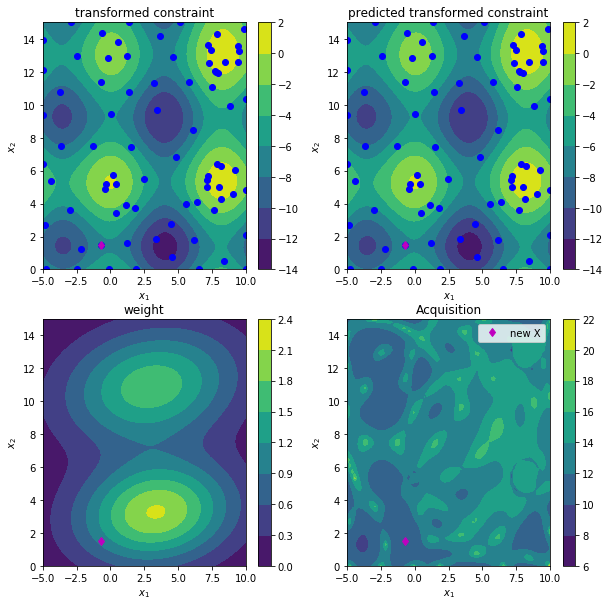

-------------------------------------------------------------------
------------------------- Iteration 76/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[ 8.61925274 15.        ]]), New  value: [-0.67375226]


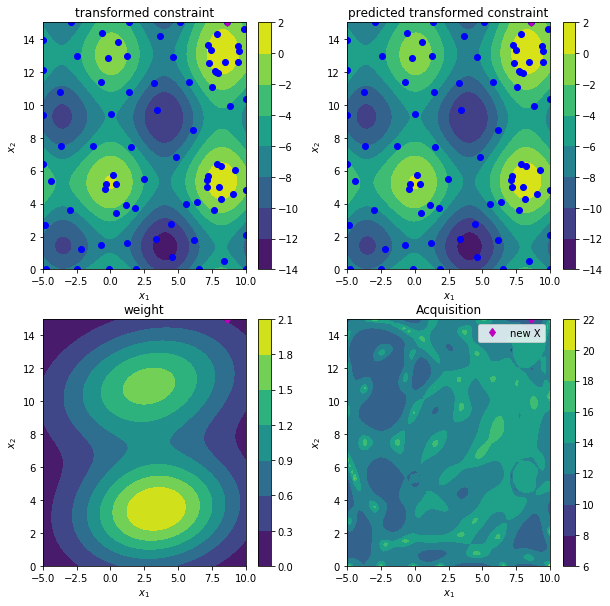

-------------------------------------------------------------------
------------------------- Iteration 77/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[ 7.1668531 13.3340228]]), New  value: [-0.00031708]


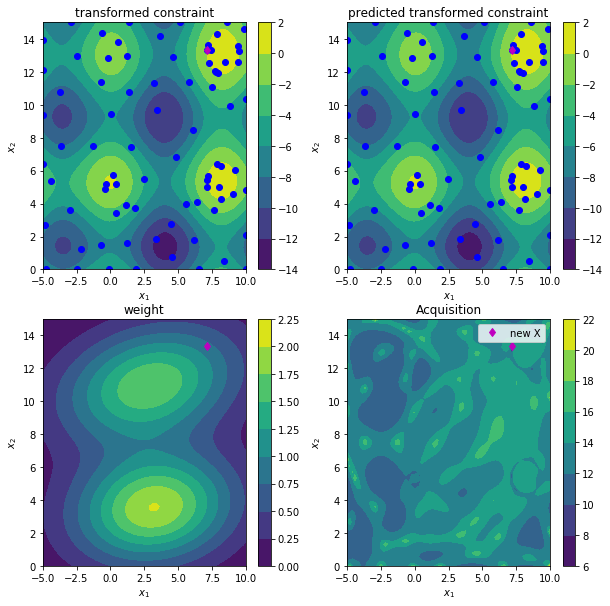

-------------------------------------------------------------------
------------------------- Iteration 78/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[-1.92090207 11.81930471]]), New  value: [-4.72439639]


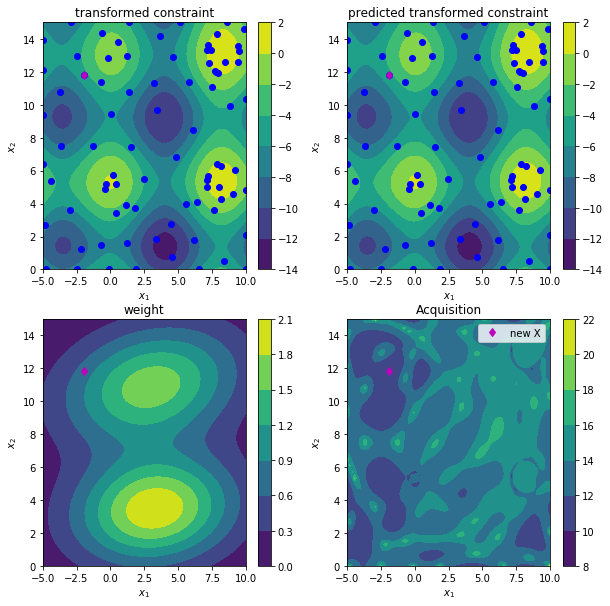

-------------------------------------------------------------------
------------------------- Iteration 79/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[-2.21793097  9.78056808]]), New  value: [-8.85771587]


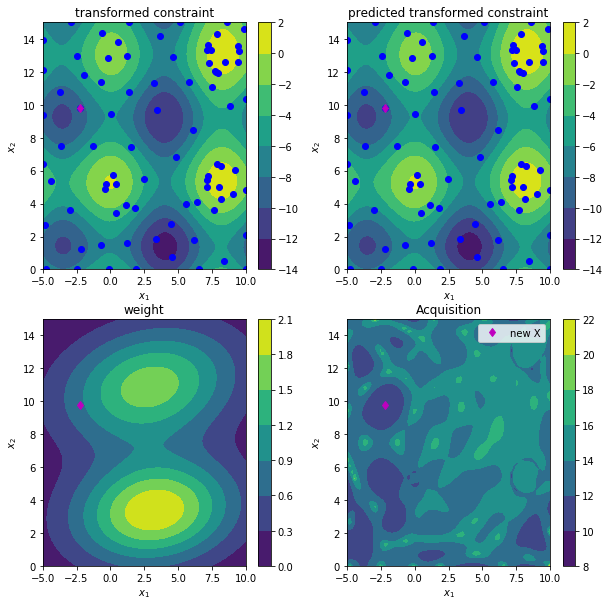

-------------------------------------------------------------------
------------------------- Iteration 80/80 -------------------------
-------------------------------------------------------------------
Train GP...
Fit GMM...
Computing next acquisition point...
Updating data-set...
True location: ([4.05597308 1.38962682]), True value: -12.873453392987496
Best location: ([4.56756744 0.77135722]), Best value: -12.162078639019736
New  location: ([[0.16865034 5.66112391]]), New  value: [-1.53923279e-06]


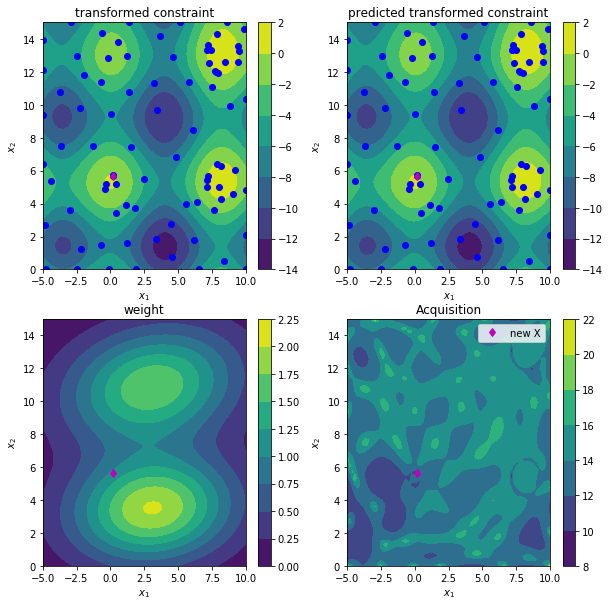

In [3]:
# Main Bayesian optimization loop
rng_key = random.PRNGKey(0)
for it in range(options['nIter']):
    print('-------------------------------------------------------------------')
    print('------------------------- Iteration %d/%d -------------------------' % (it+1, options['nIter']))
    print('-------------------------------------------------------------------')

    # Fetch normalized training data
    norm_batch, norm_const = normalize(X, y, bounds)

    # Train GP model
    print('Train GP...')
    rng_key = random.split(rng_key)[0]
    opt_params = gp_model.train(norm_batch,
                                rng_key,
                                num_restarts = 50)

    # Fit GMM
    if options['criterion'] == 'LW-LCB' or options['criterion'] == 'LW-US' or options['criterion'] == "LW_CLSF":
        print('Fit GMM...')
        rng_key = random.split(rng_key)[0]
        kwargs = {'params': opt_params,
                  'batch': norm_batch,
                  'norm_const': norm_const,
                  'bounds': bounds,
                  'kappa': gp_model.options['kappa'],
                  'rng_key': rng_key}
        gmm_vars = gp_model.fit_gmm(**kwargs, N_samples = 10000)
    else:
        gmm_vars = None

    # Compute next point via minimizing the acquisition function
    print('Computing next acquisition point...')
    kwargs = {'params': opt_params,
              'batch': norm_batch,
              'norm_const': norm_const,
              'bounds': bounds,
              'kappa': gp_model.options['kappa'],
              'gmm_vars': gmm_vars,
              'rng_key': rng_key}
    new_X,_,_ = gp_model.compute_next_point_lbfgs(num_restarts=10, **kwargs)

    # Acquire data
    new_y = vmap(f)(new_X)
    new_y = new_y + noise*new_y.std(0)*onp.random.normal(new_y.shape)

    # Augment training data
    print('Updating data-set...')
    X = np.concatenate([X, new_X], axis = 0)
    y = np.concatenate([y, new_y], axis = 0)

    # Print current best
    idx_best = np.argmin(y)
    best_x = X[idx_best,:]
    best_y = y.min()
    print('True location: ({}), True value: {}'.format(true_x, true_y))
    print('Best location: ({}), Best value: {}'.format(best_x, best_y))
    print('New  location: ({}), New  value: {}'.format(new_X, new_y))
    
    
    # Compute predictions
    
    mean, std = gp_model.predict(X_star, **kwargs)
    
    mean = mean * norm_const['sigma_y'] + norm_const['mu_y'] 
    
    if options['criterion'] == 'LW-LCB' or options['criterion'] == 'LW-US' or options['criterion'] == "LW_CLSF":
        w_pred = compute_w_gmm(X_star, **kwargs)
    else:
        w_pred = np.zeros(X_star.shape[0])
        
    acq_fun = lambda x: gp_model.acquisition(x, **kwargs)
    a_pred = vmap(acq_fun)(X_star)
    
    Y_pred = griddata(onp.array(X_star), onp.array(mean), (onp.array(XX), onp.array(YY)), method='cubic')
    Y_star = griddata(onp.array(X_star), onp.array(y_star), (onp.array(XX), onp.array(YY)), method='cubic')
    W_star = griddata(onp.array(X_star), onp.array(w_pred), (onp.array(XX), onp.array(YY)), method='cubic')
    A_star = griddata(onp.array(X_star), onp.array(a_pred), (onp.array(XX), onp.array(YY)), method='cubic')

    
    plt.figure(it + 100, figsize = (10,10))
    plt.subplot(2, 2, 1)
    fig = plt.contourf(XX, YY, Y_star)
    plt.plot(X[:,0], X[:,1], 'bo', label = "Objective data")
    plt.plot(new_X[:,0], new_X[:,1], 'md', label = 'new X')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.title(r'transformed constraint')
    plt.colorbar(fig)

    plt.subplot(2, 2, 2)
    fig = plt.contourf(XX, YY, Y_pred)
    plt.plot(X[:,0], X[:,1], 'bo', label = "Objective data")
    plt.plot(new_X[:,0], new_X[:,1], 'md', label = 'new X')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.title(r'predicted transformed constraint')
    plt.colorbar(fig)
    
    plt.subplot(2, 2, 3)
    fig = plt.contourf(XX, YY, W_star)
    plt.plot(new_X[:,0], new_X[:,1], 'md', label = 'new X')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.title(r'weight')
    plt.colorbar(fig)
    
    plt.subplot(2, 2, 4)
    fig = plt.contourf(XX, YY, A_star)
    plt.plot(new_X[:,0], new_X[:,1], 'md', label = 'new X')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.title(r'Acquisition')
    plt.colorbar(fig)
    plt.legend()
    plt.show()
    
    
    